In [46]:
# import libraries
import numpy as np
import pandas as pd
import sys
import csv

In [47]:
csv.field_size_limit(1000000000)
df = pd.read_csv("./data/state-of-the-union.csv", names=["year", "speech"], header=None)
df.head()

year                                             speech
0  1790  George Washington\nJanuary 8, 1790\n\nFellow-C...
1  1790  \nState of the Union Address\nGeorge Washingto...
2  1791  \nState of the Union Address\nGeorge Washingto...
3  1792  \nState of the Union Address\nGeorge Washingto...
4  1793  \nState of the Union Address\nGeorge Washingto...

In [48]:
df.shape

(226, 2)

In [49]:
# check for duplicate rows
df.duplicated().sum()

0

In [50]:
# check for missing values
df.isnull().sum()

year      0
speech    0
dtype: int64

In [51]:
# read stop words
custom_stopwords = pd.read_csv("./data/stopwords-en.csv", header=None)

custom_stopwords.shape

# convert to a set of unique words
custom_stopwords = set(custom_stopwords[0])

In [52]:
# Stop words
STOP_WORDS = set(
    """
a about above across after afterwards again against all almost alone along
already also although always am among amongst amount an and another any anyhow
anyone anything anyway anywhere are around as at

back be became because become becomes becoming been before beforehand behind
being below beside besides between beyond both bottom but by

call can cannot ca could

did do does doing done down due during

each eight either eleven else elsewhere empty enough even ever every
everyone everything everywhere except

few fifteen fifty first five for former formerly forty four from front full
further

get give go

had has have he hence her here hereafter hereby herein hereupon hers herself
him himself his how however hundred

i if in indeed into is it its itself

keep

last latter latterly least less

just

made make many may me meanwhile might mine more moreover most mostly move much
must my myself

name namely neither never nevertheless next nine no nobody none noone nor not
nothing now nowhere

of off often on once one only onto or other others otherwise our ours ourselves
out over own

part per perhaps please put

quite

rather re really regarding

same say see seem seemed seeming seems serious several she should show side
since six sixty so some somehow someone something sometime sometimes somewhere
still such

take ten than that the their them themselves then thence there thereafter
thereby therefore therein thereupon these they third this those though three
through throughout thru thus to together too top toward towards twelve twenty
two

under until up unless upon us used using

various very very via was we well were what whatever when whence whenever where
whereafter whereas whereby wherein whereupon wherever whether which while
whither who whoever whole whom whose why will with within without would

yet you your yours yourself yourselves
""".split()
)

contractions = ["n't", "'d", "'ll", "'m", "'re", "'s", "'ve"]
STOP_WORDS.update(contractions)

for apostrophe in ["‘", "’"]:
    for stopword in contractions:
        STOP_WORDS.add(stopword.replace("'", apostrophe))

In [53]:
us_presidents_stopwords = {
    "george",
    "washington",
    "john",
    "adams",
    "thomas",
    "jefferson",
    "james",
    "madison",
    "monroe",
    "quincy",
    "jackson",
    "martin",
    "van",
    "buren",
    "william",
    "henry",
    "harrison",
    "tyler",
    "knox",
    "polk",
    "zachary",
    "taylor",
    "millard",
    "fillmore",
    "franklin",
    "pierce",
    "buchanan",
    "abraham",
    "lincoln",
    "andrew",
    "johnson",
    "ulysses",
    "grant",
    "rutherford",
    "hayes",
    "garfield",
    "chester",
    "arthur",
    "grover",
    "cleveland",
    "benjamin",
    "mcKinley",
    "theodore",
    "roosevelt",
    "taft",
    "woodrow",
    "wilson",
    "warren",
    "harding",
    "calvin",
    "coolidge",
    "herbert",
    "hoover",
    "truman",
    "eisenhower",
    "kennedy",
    "lyndon",
    "nixon",
    "gerald",
    "ford",
    "jimmy",
    "carter",
    "ronald",
    "reagan",
    "bill",
    "clinton",
    "obama",
    "donald",
    "trump",
    "joe",
    "biden",
}


# other stopwords for this specific dataset
other_stopwords = {
    "state",
    "union",
    "mr",
    "speaker",
    "vice",
    "members",
    "senate",
    "house",
    "representatives",
    "fellow",
    "citizens",
    "united",
    "states",
    "america",
    "american",
    "americans",
    "congress",
    "congressmen",
    "congresswomen",
    "congressman",
    "congresswoman",
    "president",
    "address",
    "tonight",
    "today",
}

months = {
    "january",
    "february",
    "march",
    "april",
    "may",
    "june",
    "july",
    "august",
    "september",
    "october",
    "november",
    "december",
}

In [54]:
import nltk

nltk.download("stopwords")

# import stopwords from nltk
from nltk.corpus import stopwords

# nltk stopwords as set
nltk_stopwords = set(stopwords.words("english"))

# spacy stopwords as set
spacy_stopwords = STOP_WORDS

# combine spacy and custom stopwords
all_stopwords = spacy_stopwords.union(custom_stopwords)

# add nltk stopwords
all_stopwords = all_stopwords.union(nltk_stopwords)

# UPDATE STOPWORDS
# add US presidents stopwords
all_stopwords = all_stopwords.union(us_presidents_stopwords)
# add other stopwords
all_stopwords = all_stopwords.union(other_stopwords)
# add months
all_stopwords = all_stopwords.union(months)

# # shape of the combined stopwords
len(all_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajult\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


521

In [55]:
from gensim.parsing.preprocessing import (
    preprocess_string,
    strip_tags,
    strip_punctuation,
    strip_numeric,
    remove_stopwords,
)


# custom function to remove stopwords using the custom stop words
def remove_stopwords_custom(text):
    return remove_stopwords(text, stopwords=all_stopwords)


# base function to clean the speech using gensim package
def preprocess_text(text):
    filters = [
        strip_tags,
        strip_punctuation,
        strip_numeric,
        remove_stopwords_custom,
        # stem_text,
    ]
    text = preprocess_string(text, filters)
    return text

In [56]:
# convert to lowercase
df["speech"] = df["speech"].str.lower()

# apply the function to the speech column
df["clean_speech"] = df["speech"].apply(preprocess_text)

In [57]:
df.head()

year                                             speech  \
0  1790  george washington\njanuary 8, 1790\n\nfellow-c...   
1  1790  \nstate of the union address\ngeorge washingto...   
2  1791  \nstate of the union address\ngeorge washingto...   
3  1792  \nstate of the union address\ngeorge washingto...   
4  1793  \nstate of the union address\ngeorge washingto...   

                                        clean_speech  
0  [embrace, great, satisfaction, opportunity, pr...  
1  [meeting, feel, satisfaction, able, repeat, co...  
2  [vain, expect, peace, indians, frontiers, long...  
3  [abatement, satisfaction, meet, present, occas...  
4  [commencement, term, called, office, fit, occa...

In [58]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


# Function to lemmatize words
def lemmatize_list(word_list):
    return [lemmatizer.lemmatize(word, pos="v") for word in word_list]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajult\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Apply the lemmatize function to the clean_speech column
df["lemmatized_speech"] = df["clean_speech"].apply(lemmatize_list)

In [60]:
df.head()

year                                             speech  \
0  1790  george washington\njanuary 8, 1790\n\nfellow-c...   
1  1790  \nstate of the union address\ngeorge washingto...   
2  1791  \nstate of the union address\ngeorge washingto...   
3  1792  \nstate of the union address\ngeorge washingto...   
4  1793  \nstate of the union address\ngeorge washingto...   

                                        clean_speech  \
0  [embrace, great, satisfaction, opportunity, pr...   
1  [meeting, feel, satisfaction, able, repeat, co...   
2  [vain, expect, peace, indians, frontiers, long...   
3  [abatement, satisfaction, meet, present, occas...   
4  [commencement, term, called, office, fit, occa...   

                                   lemmatized_speech  
0  [embrace, great, satisfaction, opportunity, pr...  
1  [meet, feel, satisfaction, able, repeat, congr...  
2  [vain, expect, peace, indians, frontiers, long...  
3  [abatement, satisfaction, meet, present, occas...  
4  [commencement, term, call, office, fit, occasi...

In [61]:
# saved the lemmatized speech to a different df
df_lemmatized = df[["year", "lemmatized_speech"]].copy()

df_lemmatized.head()

year                                  lemmatized_speech
0  1790  [embrace, great, satisfaction, opportunity, pr...
1  1790  [meet, feel, satisfaction, able, repeat, congr...
2  1791  [vain, expect, peace, indians, frontiers, long...
3  1792  [abatement, satisfaction, meet, present, occas...
4  1793  [commencement, term, call, office, fit, occasi...

In [62]:
# function to get word frequency

from collections import defaultdict


def get_word_freq(df):
    word_freq = defaultdict(int)
    for index, row in df.iterrows():
        for word in row["lemmatized_speech"]:
            word_freq[word] += 1
    return word_freq


word_freq = get_word_freq(df_lemmatized)

word_freq

defaultdict(int,
            {'embrace': 95,
             'great': 2031,
             'satisfaction': 192,
             'opportunity': 386,
             'present': 1314,
             'congratulate': 53,
             'favorable': 175,
             'prospect': 111,
             'public': 1596,
             'affairs': 325,
             'recent': 240,
             'accession': 19,
             'important': 639,
             'north': 203,
             'carolina': 24,
             'constitution': 502,
             'official': 127,
             'information': 266,
             'receive': 636,
             'rise': 226,
             'credit': 289,
             'respectability': 4,
             'country': 1972,
             'general': 807,
             'increase': 1310,
             'good': 899,
             'government': 4247,
             'concord': 9,
             'peace': 1385,
             'plenty': 24,
             'bless': 100,
             'circumstances': 243,
             'auspicious':

In [63]:
word_freq["s"]

0

In [64]:
# function to filter out words from df that have a frequency less than a certain threshold
threshold = 15
df_lemmatized["lemmatized_speech_filtered"] = df_lemmatized["lemmatized_speech"].apply(
    lambda x: [word for word in x if word_freq[word] >= threshold]
)

In [65]:
df_lemmatized.head()

year                                  lemmatized_speech  \
0  1790  [embrace, great, satisfaction, opportunity, pr...   
1  1790  [meet, feel, satisfaction, able, repeat, congr...   
2  1791  [vain, expect, peace, indians, frontiers, long...   
3  1792  [abatement, satisfaction, meet, present, occas...   
4  1793  [commencement, term, call, office, fit, occasi...   

                          lemmatized_speech_filtered  
0  [embrace, great, satisfaction, opportunity, pr...  
1  [meet, feel, satisfaction, able, repeat, favor...  
2  [vain, expect, peace, indians, frontiers, long...  
3  [satisfaction, meet, present, occasion, contin...  
4  [commencement, term, call, office, fit, occasi...

In [66]:
# creating a dictionary of words
from gensim.corpora import Dictionary

dictionary = Dictionary(df_lemmatized["lemmatized_speech_filtered"])
print("Number of unique words in the dictionary:", len(dictionary))

Number of unique words in the dictionary: 3698


In [67]:
# creating a corpus of words from the lemmatised speech
corpus = [
    dictionary.doc2bow(doc) for doc in df_lemmatized["lemmatized_speech_filtered"]
]

In [68]:
from gensim import models

# create a tfidf model
tfidf = models.TfidfModel(corpus)

In [69]:
# apply the tfidf model to the corpus
corpus_tfidf = tfidf[corpus]

corpus_tfidf[0]

[(0, 0.023493553656885782),
 (1, 0.10546647048254386),
 (2, 0.03009940394633673),
 (3, 0.020107526657857318),
 (4, 0.025130833909801177),
 (5, 0.017532177841233145),
 (6, 0.03575876592925789),
 (7, 0.020107526657857318),
 (8, 0.06958058553699342),
 (9, 0.05856300437069292),
 (10, 0.04377190382389711),
 (11, 0.03163780531950193),
 (12, 0.03891326288076146),
 (13, 0.013071348263610031),
 (14, 0.030861347592039855),
 (15, 0.03532740954219943),
 (16, 0.11966442596900363),
 (17, 0.10546647048254386),
 (18, 0.01563589183214195),
 (19, 0.059892423956193624),
 (20, 0.04496327759666201),
 (21, 0.043890510468833646),
 (22, 0.030744108059143464),
 (23, 0.010893588976261736),
 (24, 0.03009940394633673),
 (25, 0.027186536618711527),
 (26, 0.02447958983814592),
 (27, 0.01643780880606862),
 (28, 0.04836214529454901),
 (29, 0.101592936813429),
 (30, 0.02479807452565997),
 (31, 0.10313653359436188),
 (32, 0.020107526657857318),
 (33, 0.10546647048254386),
 (34, 0.012089064631735006),
 (35, 0.0175321778

In [76]:
texts = df_lemmatized["lemmatized_speech_filtered"].tolist()

texts[0]

len(texts)

226

In [141]:
texts[0]

['embrace',
 'great',
 'satisfaction',
 'opportunity',
 'present',
 'congratulate',
 'present',
 'favorable',
 'prospect',
 'public',
 'affairs',
 'recent',
 'accession',
 'important',
 'north',
 'carolina',
 'constitution',
 'official',
 'information',
 'receive',
 'rise',
 'credit',
 'country',
 'general',
 'increase',
 'good',
 'government',
 'peace',
 'plenty',
 'bless',
 'circumstances',
 'eminent',
 'degree',
 'national',
 'prosperity',
 'resume',
 'general',
 'good',
 'derive',
 'encouragement',
 'reflection',
 'measure',
 'session',
 'satisfactory',
 'constituents',
 'difficulty',
 'work',
 'allow',
 'hope',
 'realize',
 'expectations',
 'secure',
 'blessings',
 'providence',
 'place',
 'reach',
 'course',
 'present',
 'important',
 'session',
 'deliberate',
 'exertion',
 'patriotism',
 'firmness',
 'wisdom',
 'interest',
 'object',
 'engage',
 'attention',
 'provide',
 'common',
 'defense',
 'merit',
 'particular',
 'regard',
 'prepare',
 'war',
 'effectual',
 'mean',
 'preser

# LSI Modelling


In [74]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)
corpus_lsi = lsi_model[corpus_tfidf]

lsi_model.print_topics(num_topics=10, num_words=8)

[(0,
  '-0.114*"program" + -0.087*"help" + -0.082*"job" + -0.080*"economic" + -0.075*"budget" + -0.063*"treaty" + -0.059*"let" + -0.058*"tax"'),
 (1,
  '-0.173*"program" + -0.157*"job" + -0.147*"help" + -0.124*"budget" + -0.102*"economic" + -0.099*"spend" + -0.096*"billion" + -0.094*"school"'),
 (2,
  '0.148*"job" + -0.127*"interstate" + 0.125*"iraq" + -0.111*"economic" + 0.105*"school" + -0.104*"farm" + 0.104*"terrorists" + -0.101*"industrial"'),
 (3,
  '0.155*"silver" + -0.136*"program" + -0.125*"militia" + 0.104*"gold" + -0.092*"economic" + 0.087*"iraq" + 0.086*"circulation" + 0.083*"arbitration"'),
 (4,
  '-0.268*"interstate" + -0.211*"corporations" + -0.154*"railroad" + 0.143*"program" + 0.139*"mexico" + 0.126*"soviet" + -0.094*"combinations" + 0.094*"communist"'),
 (5,
  '0.235*"terrorists" + 0.227*"iraq" + 0.180*"fight" + 0.164*"terror" + 0.160*"enemy" + 0.137*"iraqi" + 0.136*"al" + 0.136*"terrorist"'),
 (6,
  '-0.336*"mexico" + -0.290*"texas" + 0.170*"silver" + -0.161*"mexican"

In [86]:
# function to check the coherence measure of the LSI model
from gensim.models.coherencemodel import CoherenceModel


def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LsiModel(corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [87]:
limit = 31
start = 5
step = 1
x = range(start, limit, step)

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus_tfidf,
    texts=texts,
    start=start,
    limit=limit,
    step=step,
)

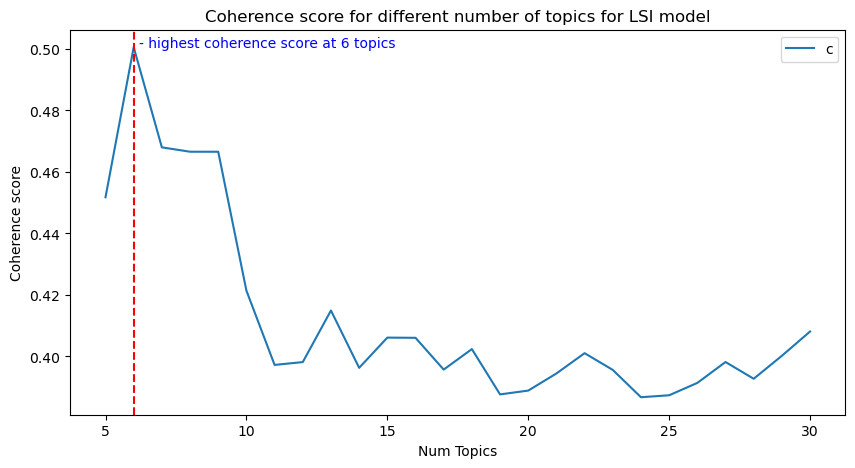

In [210]:
import matplotlib.pyplot as plt


# best number of topics
coherence_values_max = max(coherence_values)

best_num_topics = coherence_values.index(coherence_values_max) + start


plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.title("Coherence score for different number of topics for LSI model")
plt.axvline(x=best_num_topics, color="r", linestyle="--")
# text showing the best number of topics
plt.text(
    best_num_topics + 0.2,
    coherence_values_max,
    f"- highest coherence score at {best_num_topics} topics",
    color="b",
)
plt.show()

### LSI model with best coherence score


In [217]:
# creating the LSI model with the best number of topics
lsi_model_best = models.LsiModel(
    corpus_tfidf, id2word=dictionary, num_topics=best_num_topics
)
corpus_lsi_best = lsi_model_best[corpus_tfidf]

# print the best number of topics
print(
    f"Coherence score was highest at {coherence_values_max} for {best_num_topics} topics"
)

Coherence score was highest at 0.5005631876201838 for 6 topics


In [218]:
# print the topics as co-efficients
# lsi_model_best.print_topics(num_topics=best_num_topics, num_words=7)


# function to print the topics neatly
def print_topics(model, num_topics):
    for i in range(num_topics):
        print(f"Topic {i}:")
        print(model.print_topic(i))
        print("\n")


print_topics(lsi_model_best, best_num_topics)

Topic 0:
-0.114*"program" + -0.087*"help" + -0.082*"job" + -0.080*"economic" + -0.075*"budget" + -0.063*"treaty" + -0.059*"let" + -0.058*"tax" + -0.058*"mexico" + -0.057*"billion"


Topic 1:
-0.173*"program" + -0.157*"job" + -0.147*"help" + -0.124*"budget" + -0.102*"economic" + -0.099*"spend" + -0.096*"billion" + -0.094*"school" + -0.093*"percent" + -0.088*"let"


Topic 2:
0.148*"job" + -0.127*"interstate" + 0.125*"iraq" + -0.111*"economic" + 0.105*"school" + -0.104*"farm" + 0.104*"terrorists" + -0.102*"industrial" + 0.095*"children" + -0.092*"program"


Topic 3:
-0.155*"silver" + 0.136*"program" + 0.125*"militia" + -0.105*"gold" + 0.092*"economic" + -0.086*"iraq" + -0.086*"circulation" + -0.084*"arbitration" + 0.083*"soviet" + 0.083*"gentlemen"


Topic 4:
0.269*"interstate" + 0.211*"corporations" + 0.155*"railroad" + -0.143*"program" + -0.139*"mexico" + -0.126*"soviet" + 0.095*"combinations" + -0.094*"communist" + -0.092*"treaty" + 0.091*"corporation"


Topic 5:
0.236*"terrorists" + 0

In [219]:
# get all the topics from the LSI model
topics = lsi_model_best.show_topics(formatted=False, num_words=5)

dict(topics)

{0: [('program', -0.11400815950773065),
  ('help', -0.08666907657123188),
  ('job', -0.08160021819039157),
  ('economic', -0.07954190057020481),
  ('budget', -0.07483149927380985)],
 1: [('program', -0.17334653016782128),
  ('job', -0.1570513400632569),
  ('help', -0.14696583941952782),
  ('budget', -0.12350513893213731),
  ('economic', -0.10225916829408493)],
 2: [('job', 0.14826523295674165),
  ('interstate', -0.12680024491132108),
  ('iraq', 0.12479215587672308),
  ('economic', -0.1109152328152849),
  ('school', 0.1053979509050156)],
 3: [('silver', -0.15500198630812084),
  ('program', 0.13585891359411878),
  ('militia', 0.12497192552352368),
  ('gold', -0.10474973180621906),
  ('economic', 0.09194593546159702)],
 4: [('interstate', 0.2685642618674026),
  ('corporations', 0.21101548059706032),
  ('railroad', 0.15458806144644566),
  ('program', -0.1429832453066576),
  ('mexico', -0.1392155290644023)],
 5: [('terrorists', 0.23613021578838145),
  ('iraq', 0.22608278226659678),
  ('figh

In [220]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_topic_network(topic_data, edge_scaler=10, title="Topic-Word Network Graph"):
    G = nx.Graph()

    # Add edges between topics and words
    for topic, words in topic_data.items():
        topic_node = f"Topic {topic}"
        G.add_node(topic_node, color="#c1121f", size=1500)  # Topic nodes in red

        for word, weight in words:
            G.add_node(word, color="#a2d2ff", size=1000)  # Word nodes in blue
            G.add_edge(topic_node, word, weight=abs(weight))

    # Get node colors and sizes
    node_colors = [G.nodes[node]["color"] for node in G.nodes]
    node_sizes = [G.nodes[node]["size"] for node in G.nodes]

    # Get edge weights for visualization
    edge_weights = [
        G[u][v]["weight"] * edge_scaler for u, v in G.edges
    ]  # Scale for visibility

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color="orange",
        width=edge_weights,
        font_size=8,
        font_weight="550",
    )
    plt.title(title)
    plt.show()

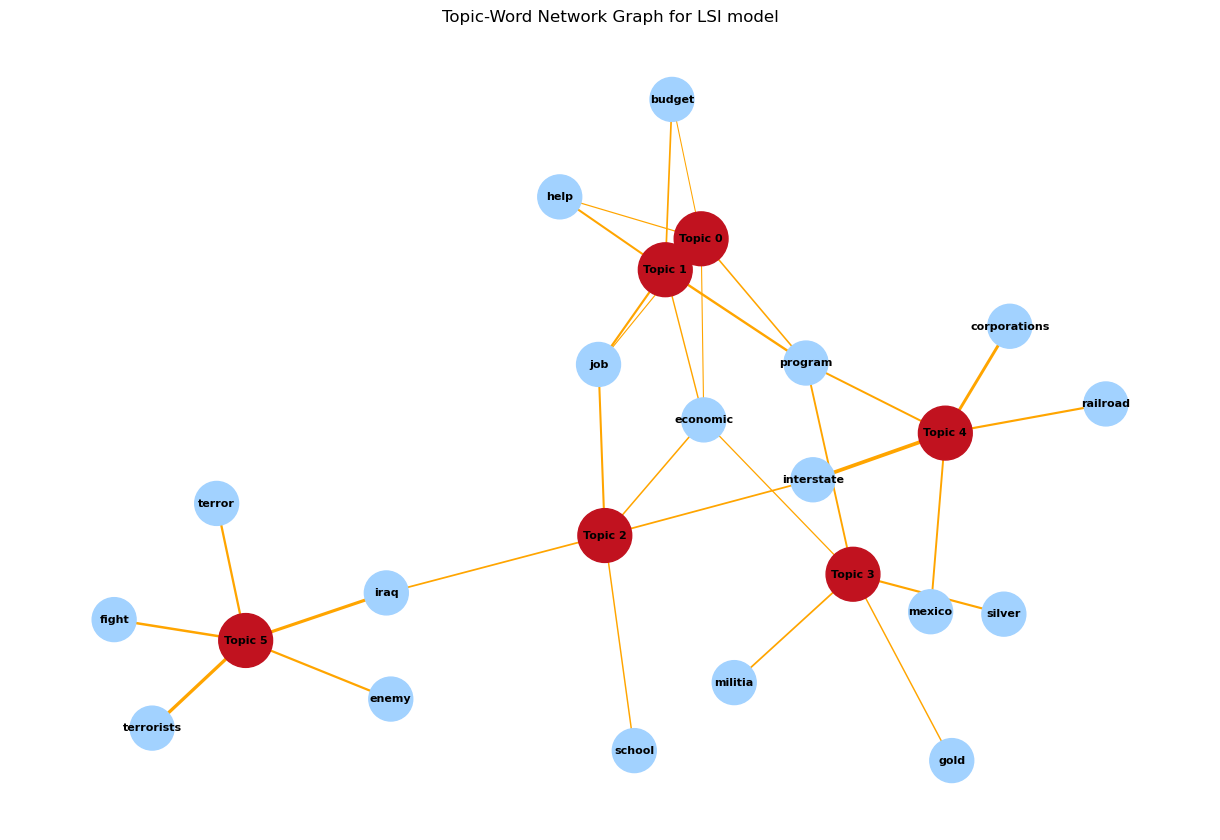

In [221]:
# plot the topic network
plot_topic_network(
    dict(topics), edge_scaler=10, title="Topic-Word Network Graph for LSI model"
)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math


def plot_topic_wordcloud(topic_data, fig_title="Topic Word Clouds"):
    num_topics = len(topic_data)
    cols = min(3, num_topics)  # Limit to 3 columns max
    rows = math.ceil(num_topics / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    fig.patch.set_facecolor("#fff")  # Set figure background color
    fig.suptitle(
        fig_title, fontsize=16, fontweight="bold", color="black"
    )  # White title

    axes = axes.flatten() if num_topics > 1 else [axes]  # Flatten if multiple subplots

    for i, (topic, words) in enumerate(topic_data.items()):
        wordcloud = WordCloud(
            width=400, height=300, background_color="#264653", colormap="plasma"
        ).generate_from_frequencies(dict(words))

        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].axis("off")
        axes[i].set_title(f"Topic {topic}", color="red")  # White subplot titles

    # Hide empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=0.5)  # Increase space between rows
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title properly
    plt.show()

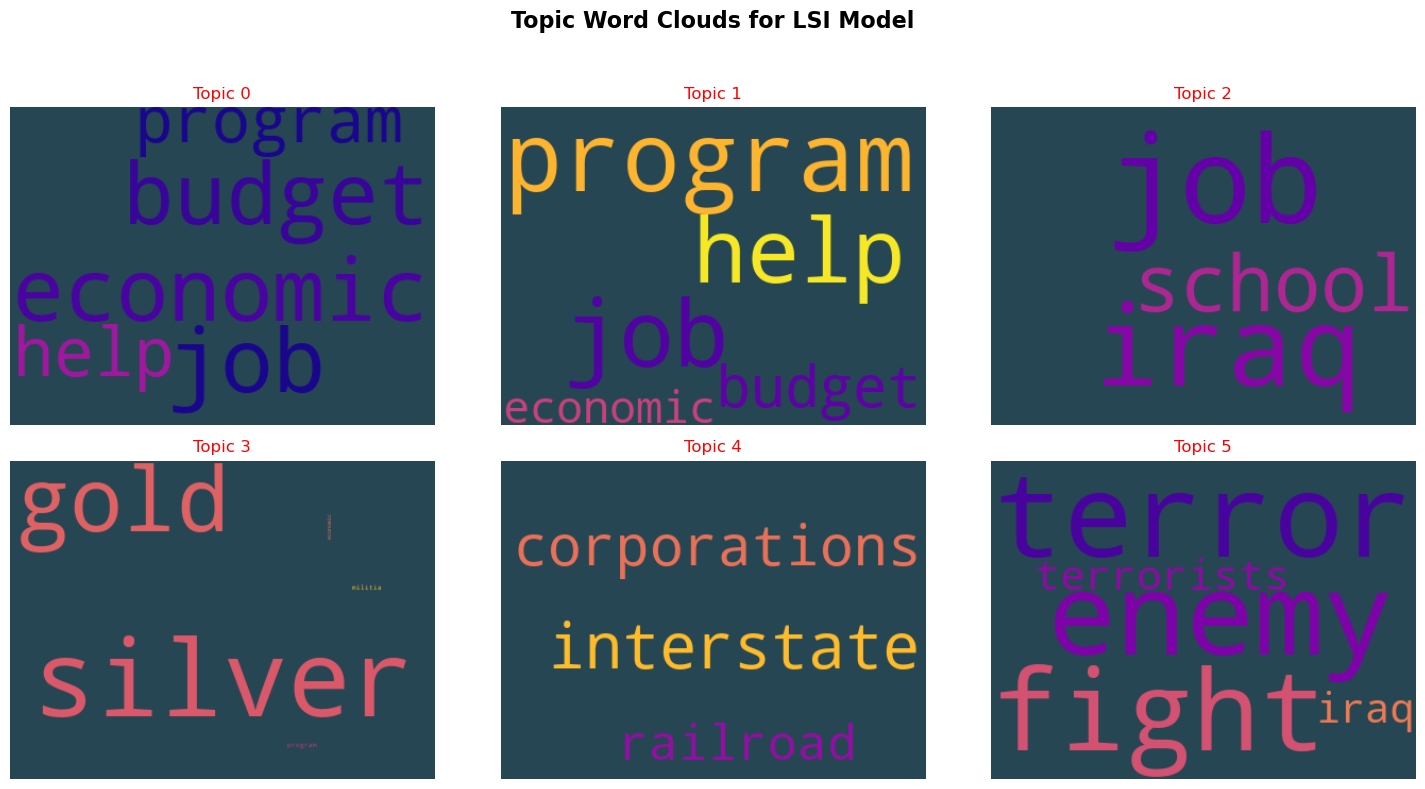

In [214]:
# plot the wordcloud
plot_topic_wordcloud(
    dict(lsi_model_best.show_topics(formatted=False, num_words=5)),
    fig_title="Topic Word Clouds for LSI Model",
)

# Topic Modelling - using LDA


In [122]:
# test lda model
from gensim.models import LdaModel

lda_model = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=10)
corpus_lda = lda_model[corpus_tfidf]

lda_model.print_topics(num_topics=10, num_words=5)

[(0,
  '0.001*"gold" + 0.001*"slave" + 0.001*"cuba" + 0.001*"spain" + 0.001*"island"'),
 (1,
  '0.001*"program" + 0.001*"interstate" + 0.001*"help" + 0.001*"corporations" + 0.001*"mexico"'),
 (2,
  '0.001*"cent" + 0.001*"program" + 0.001*"company" + 0.001*"help" + 0.001*"economic"'),
 (3,
  '0.002*"mexico" + 0.002*"treaty" + 0.001*"spain" + 0.001*"texas" + 0.001*"indemnity"'),
 (4,
  '0.001*"program" + 0.001*"economic" + 0.001*"budget" + 0.001*"interstate" + 0.001*"help"'),
 (5,
  '0.001*"terrorists" + 0.001*"help" + 0.001*"iraq" + 0.001*"program" + 0.001*"school"'),
 (6,
  '0.001*"soviet" + 0.001*"spain" + 0.001*"program" + 0.001*"indians" + 0.001*"economic"'),
 (7,
  '0.002*"program" + 0.002*"economic" + 0.001*"help" + 0.001*"job" + 0.001*"billion"'),
 (8,
  '0.001*"militia" + 0.001*"treaty" + 0.001*"article" + 0.001*"silver" + 0.001*"mexico"'),
 (9,
  '0.001*"job" + 0.001*"program" + 0.001*"budget" + 0.001*"cut" + 0.001*"children"')]

In [123]:
# function to check the coherence measure of the LSI model
from gensim.models.coherencemodel import CoherenceModel


def compute_coherence_values_lda(dictionary, corpus, texts, limit, start, step):
    lda_coherence_values = []
    lda_model_list = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics)
        lda_model_list.append(lda_model)
        coherencemodel = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        lda_coherence_values.append(coherencemodel.get_coherence())

    return lda_model_list, lda_coherence_values

In [124]:
# find best number of topics

limit = 31
start = 5
step = 1
x = range(start, limit, step)

lda_model_list, lda_coherence_values = compute_coherence_values_lda(
    dictionary=dictionary,
    corpus=corpus_tfidf,
    texts=texts,
    start=start,
    limit=limit,
    step=step,
)

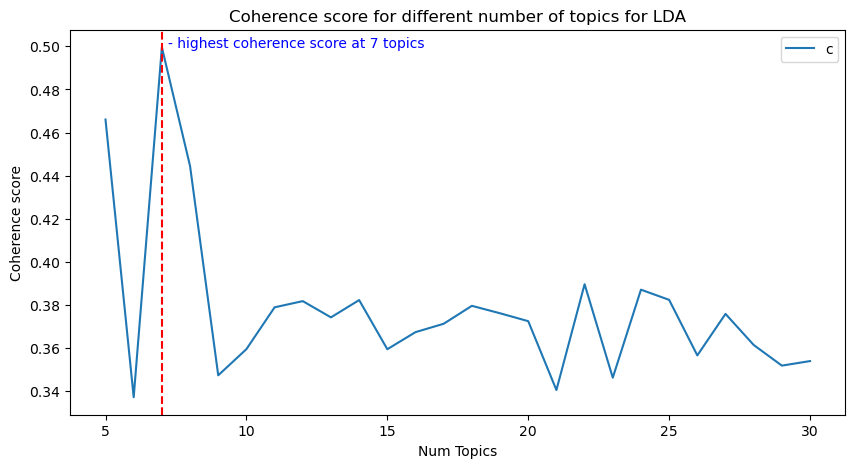

In [125]:
# best number of topics
lda_coherence_values_max = max(lda_coherence_values)

best_num_topics_lda = lda_coherence_values.index(lda_coherence_values_max) + start

plt.figure(figsize=(10, 5))
plt.plot(x, lda_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.title("Coherence score for different number of topics for LDA")
plt.axvline(x=best_num_topics_lda, color="r", linestyle="--")
# text showing the best number of topics
plt.text(
    best_num_topics_lda + 0.2,
    lda_coherence_values_max,
    f"- highest coherence score at {best_num_topics_lda} topics",
    color="b",
)
plt.show()

### LDA model with best coherence score


In [130]:
# creating the LDA model with the best number of topics
lda_model_best = LdaModel(
    corpus_tfidf, id2word=dictionary, num_topics=best_num_topics_lda
)
corpus_lda_best = lda_model_best[corpus_tfidf]

# print the best number of topics
print(
    f"Coherence score was highest at {lda_coherence_values_max} for {best_num_topics_lda} topics"
)

# get all the topics from the LDA model
topics_lda = lda_model_best.show_topics(formatted=False, num_words=5)

dict(topics_lda)

Coherence score was highest at 0.4996093640808876 for 7 topics


{0: [('program', 0.0013849947),
  ('soviet', 0.0012770745),
  ('communist', 0.0011858627),
  ('economic', 0.001121954),
  ('budget', 0.0009600585)],
 1: [('interstate', 0.0011711284),
  ('job', 0.0011671718),
  ('program', 0.001060777),
  ('spain', 0.0010354997),
  ('corporations', 0.0009974892)],
 2: [('help', 0.0015332268),
  ('program', 0.0015318962),
  ('vietnam', 0.0014410787),
  ('budget', 0.0012106667),
  ('billion', 0.0011958427)],
 3: [('mexico', 0.0010891837),
  ('program', 0.001032773),
  ('gentlemen', 0.00089850643),
  ('oil', 0.00088857854),
  ('texas', 0.00085480354)],
 4: [('mexico', 0.0011278552),
  ('program', 0.0010705392),
  ('treaty', 0.0010429418),
  ('economic', 0.0010307165),
  ('minister', 0.000971115)],
 5: [('program', 0.0016011985),
  ('economic', 0.0010612854),
  ('mexico', 0.0010088439),
  ('help', 0.0009977969),
  ('job', 0.0009217804)],
 6: [('help', 0.00114655),
  ('job', 0.0011292938),
  ('let', 0.0010078215),
  ('school', 0.0009869578),
  ('currency', 

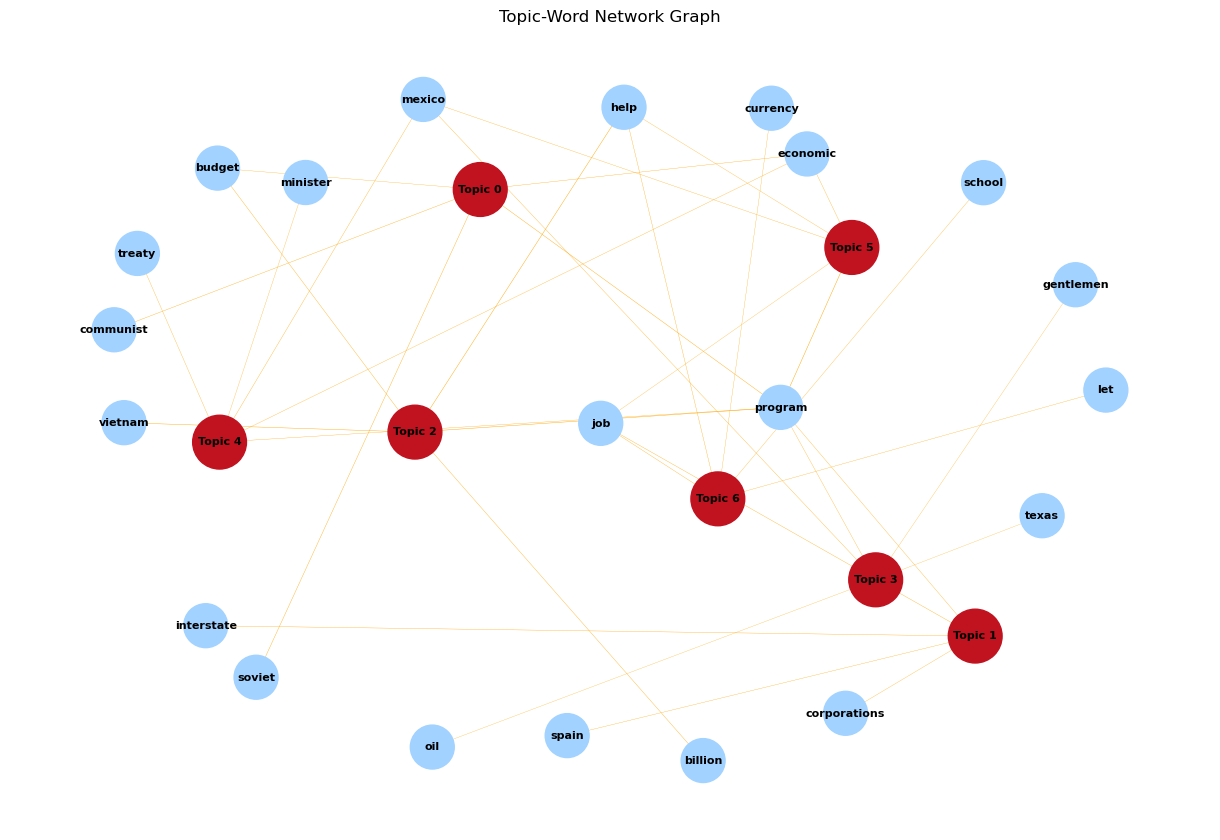

In [186]:
# plot the topic network
plot_topic_network(dict(topics_lda), edge_scaler=200)

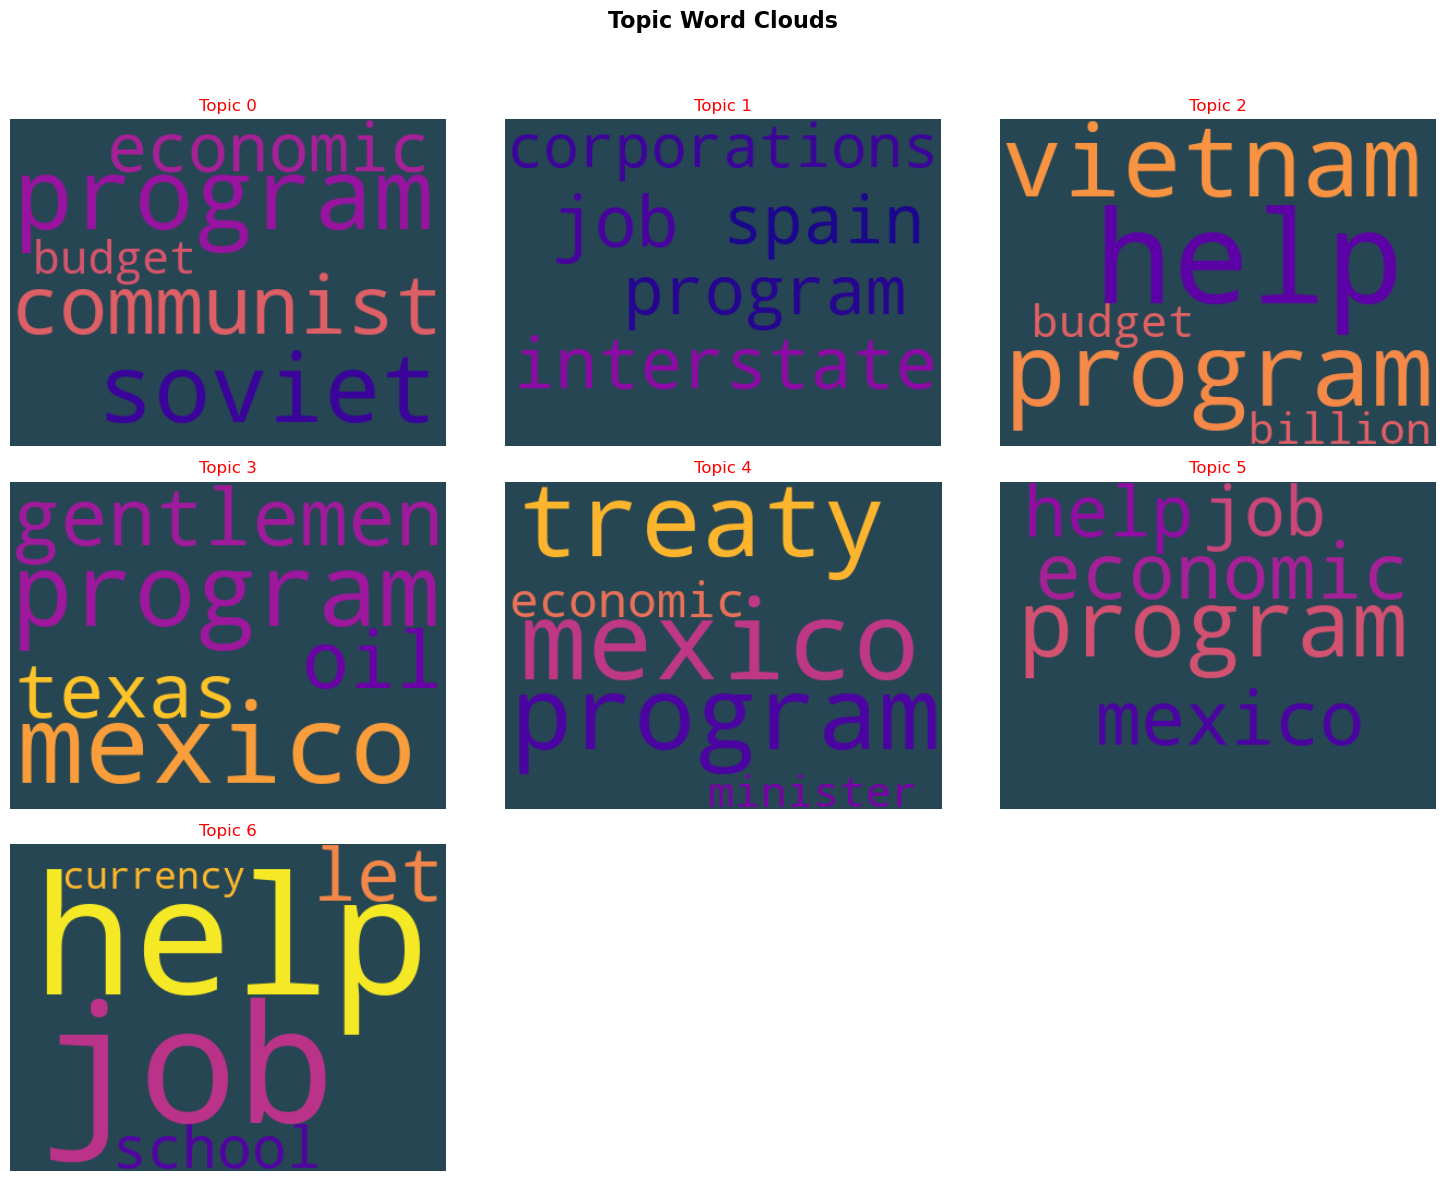

In [209]:
# plot the wordcloud
plot_topic_wordcloud(dict(lda_model_best.show_topics(formatted=False, num_words=5)))

# State of the Union Speech topics over the decades


In [142]:
# define a function that will take speech dataframe as input and return the topic of the speech using lsi and lda models
# the input df is lemmatized and filtered


def get_topics(df):
    # create a dictionary of words
    dictionary = Dictionary(df["lemmatized_speech_filtered"])
    # create a corpus of words from the lemmatised speech
    corpus = [dictionary.doc2bow(doc) for doc in df["lemmatized_speech_filtered"]]
    # create a tfidf model
    tfidf = models.TfidfModel(corpus)
    # apply the tfidf model to the corpus
    corpus_tfidf = tfidf[corpus]

    # create the LSI model
    lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=6)
    # get the LSI topics
    lsi_topics = lsi_model.show_topics(formatted=False, num_words=5)

    # create the LDA model
    lda_model = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=7)
    # get the LDA topics
    lda_topics = lda_model.show_topics(formatted=False, num_words=5)

    return lsi_topics, lda_topics

In [143]:
# get the maximum and minimum year
max_year = df["year"].max()
min_year = df["year"].min()

# print the maximum and minimum year
print(f"Dataset contains speeches from {min_year} to {max_year}")

Dataset contains speeches from 1790 to 2012


In [144]:
start_year = 1900
end_year = 2010

# filter the dataframe to get speeches from the start year to the end year
df_20_21 = df_lemmatized[
    (df_lemmatized["year"] >= start_year) & (df_lemmatized["year"] <= end_year)
].copy()

In [153]:
# variable to store the topics with the decade as the key
topics_decade_lsi = {}

topics_decade_lda = {}

# for each decade, get the topics using the get_topics function
for decade in range(start_year, end_year, 10):
    print(f"Extracting topics for speeches from {decade} to {decade + 10}")
    # filter the dataframe to get speeches from the decade to the decade + 10
    df_decade = df_20_21[
        (df_20_21["year"] >= decade) & (df_20_21["year"] < decade + 10)
    ].copy()

    # get the topics using the get_topics function
    lsi_topics, lda_topics = get_topics(df_decade)

    # store the topics in the dictionary
    topics_decade_lsi[decade] = dict(lsi_topics)
    topics_decade_lda[decade] = dict(lda_topics)

Extracting topics for speeches from 1900 to 1910
Extracting topics for speeches from 1910 to 1920
Extracting topics for speeches from 1920 to 1930
Extracting topics for speeches from 1930 to 1940
Extracting topics for speeches from 1940 to 1950
Extracting topics for speeches from 1950 to 1960
Extracting topics for speeches from 1960 to 1970
Extracting topics for speeches from 1970 to 1980
Extracting topics for speeches from 1980 to 1990
Extracting topics for speeches from 1990 to 2000
Extracting topics for speeches from 2000 to 2010


In [154]:
topics_decade_lsi

{1900: {0: [('railroad', 0.178932938320672),
   ('man', 0.10785431921034978),
   ('corporations', 0.10717549718908148),
   ('cable', 0.09917601020930042),
   ('interstate', 0.09218058278641425)],
  1: [('conference', 0.22752170064363655),
   ('legations', 0.1808905690126787),
   ('peking', 0.1489687038927942),
   ('railroad', -0.14435380510045834),
   ('chinese', 0.14148579123537403)],
  2: [('lynch', 0.3453540661724743),
   ('color', 0.3453540661724743),
   ('criticism', 0.22346439575865992),
   ('crime', 0.20539650498201847),
   ('mob', 0.18672030620429342)],
  3: [('cable', 0.3527312293135711),
   ('legations', -0.23065345772273885),
   ('peking', -0.18994990635990258),
   ('legation', -0.14924635499706618),
   ('exhibit', -0.14924635499706618)],
  4: [('cable', -0.2905544781701397),
   ('legations', -0.16219330143437674),
   ('peking', -0.13357095412242795),
   ('tariff', -0.12418227880924526),
   ('immigrants', 0.10887600059688926)],
  5: [('cities', 0.14338692550288346),
   ('net

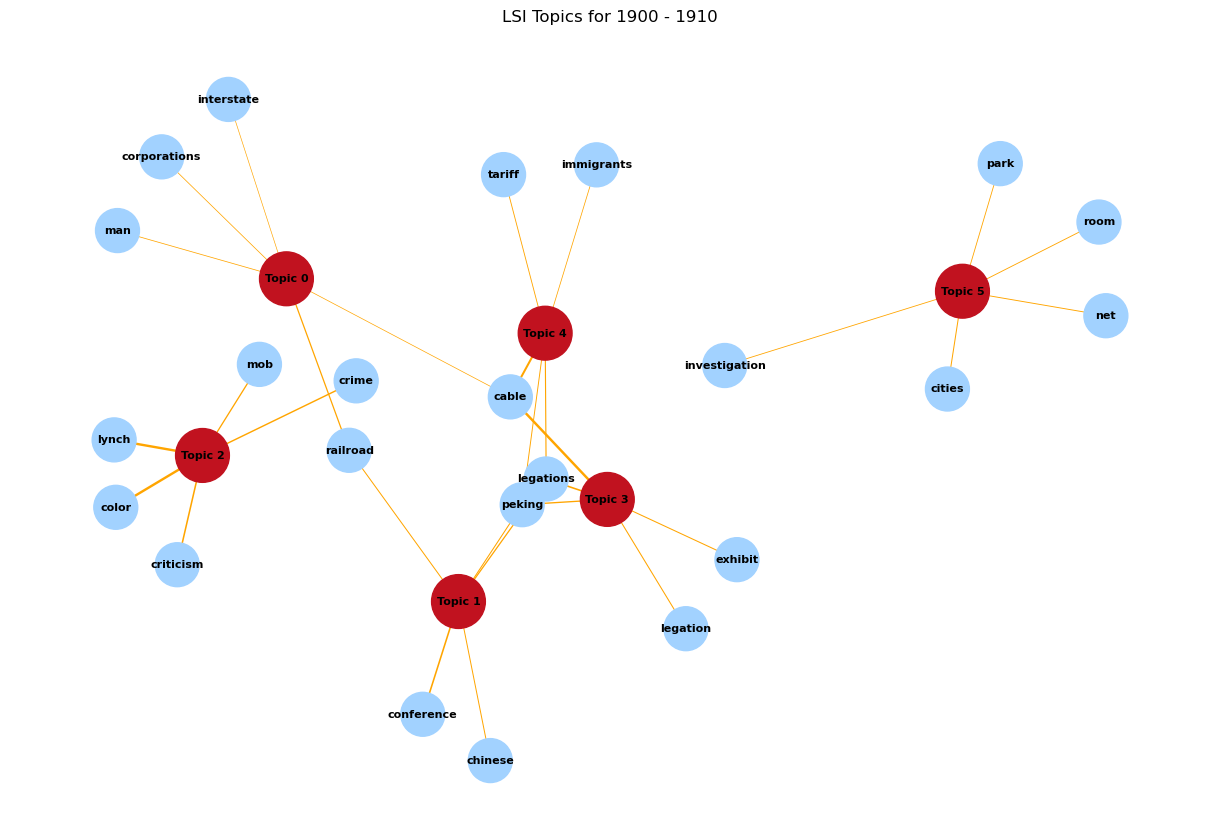

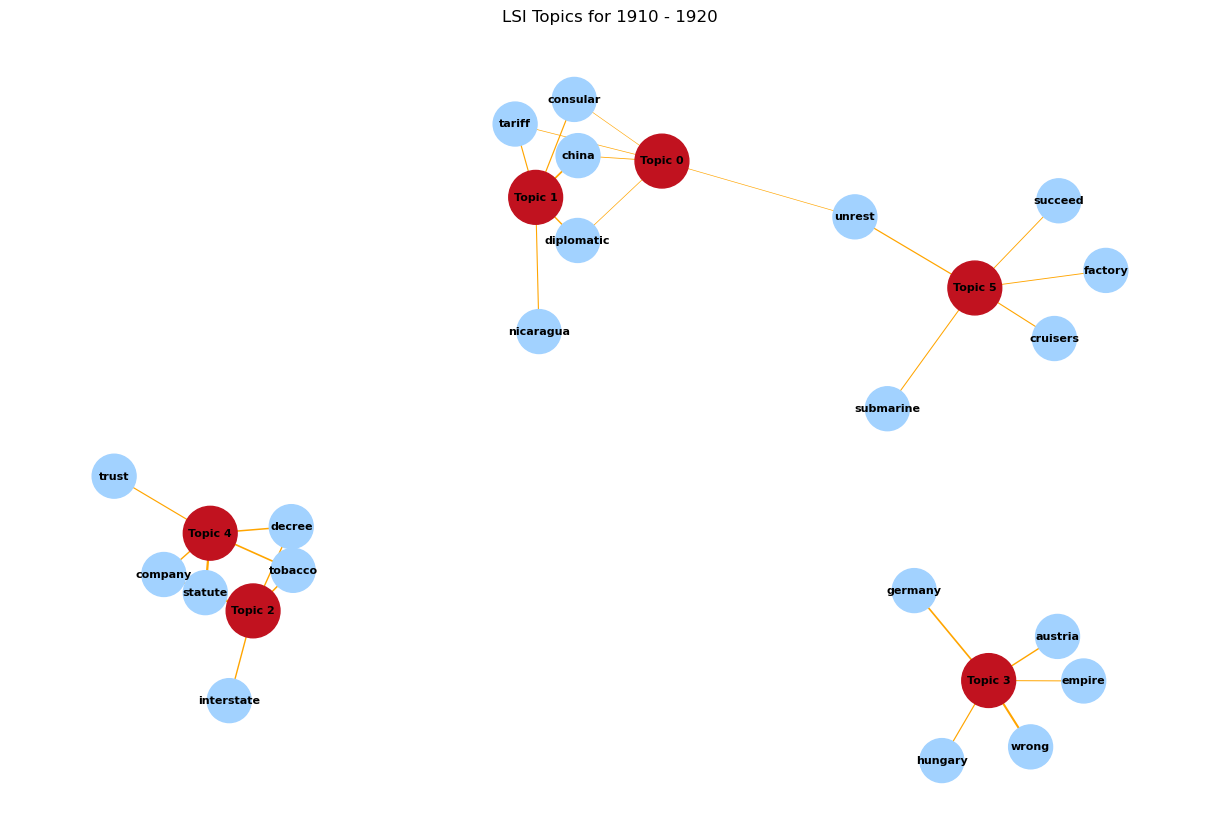

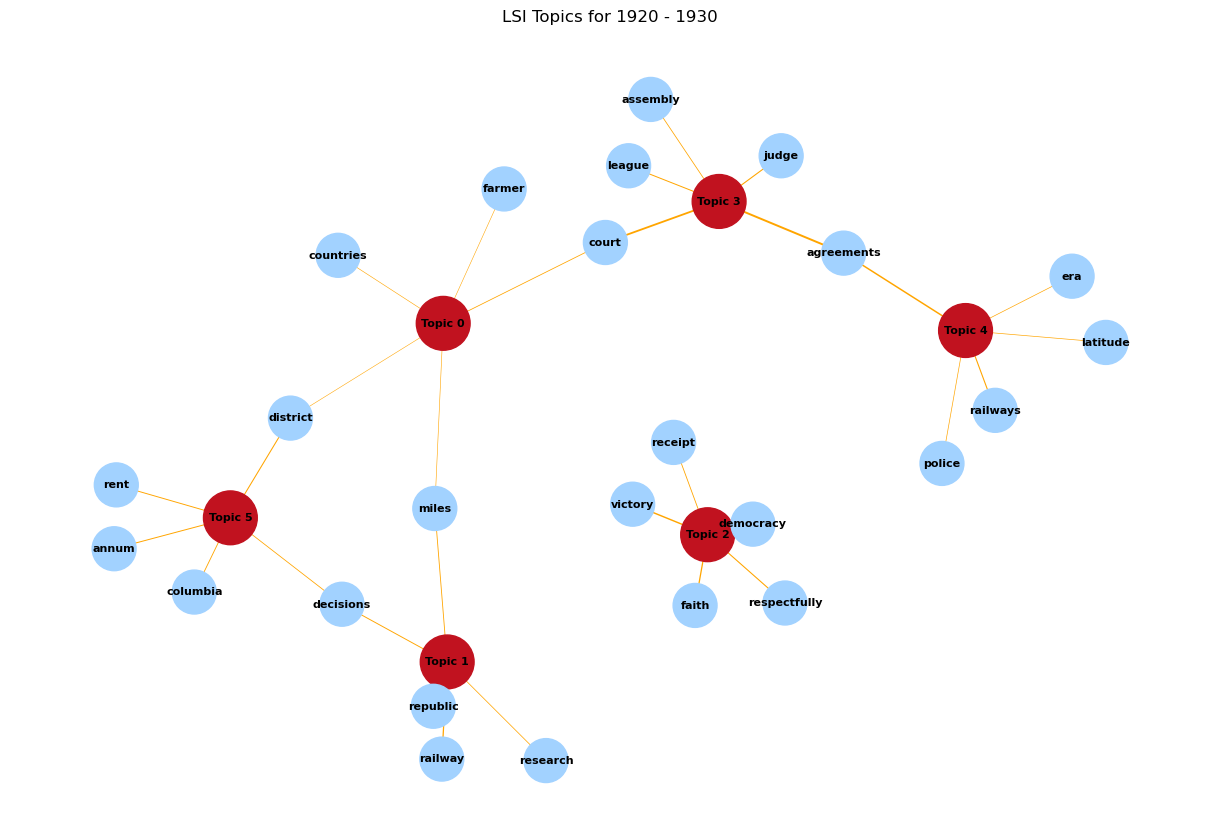

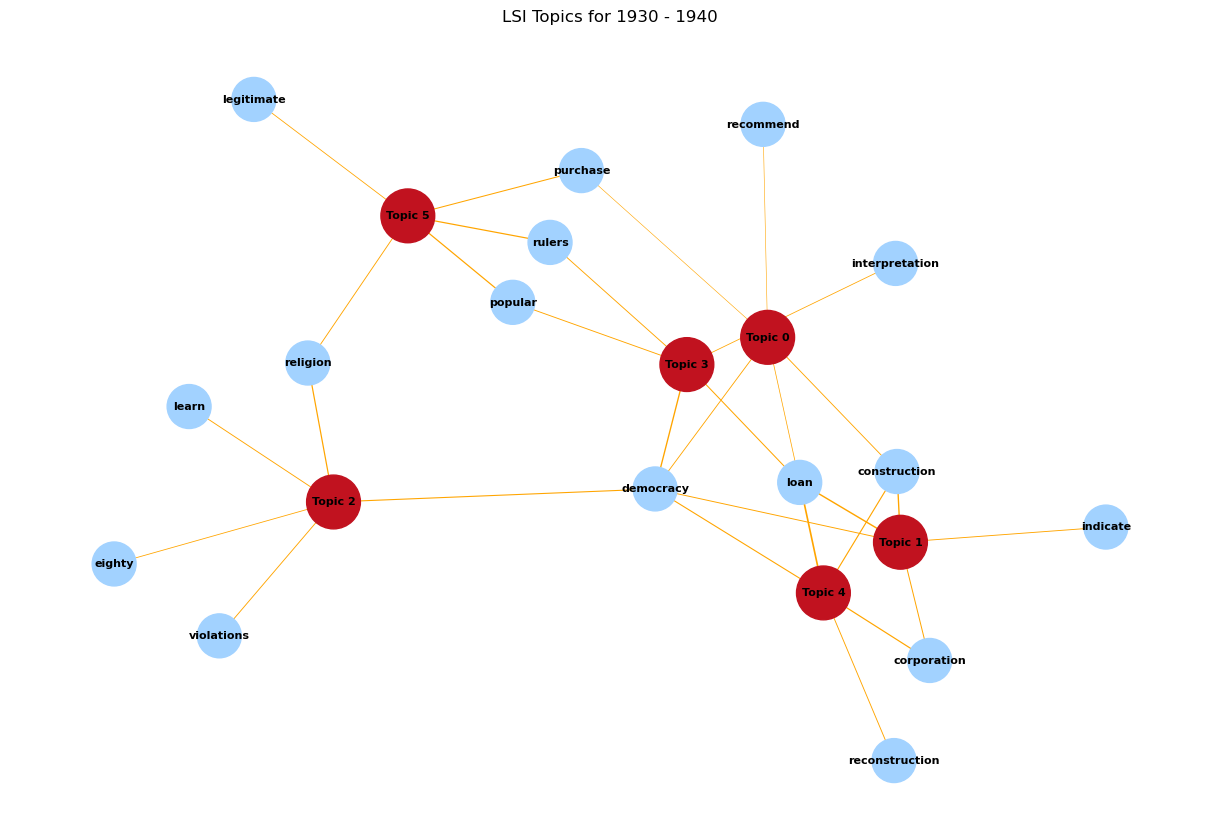

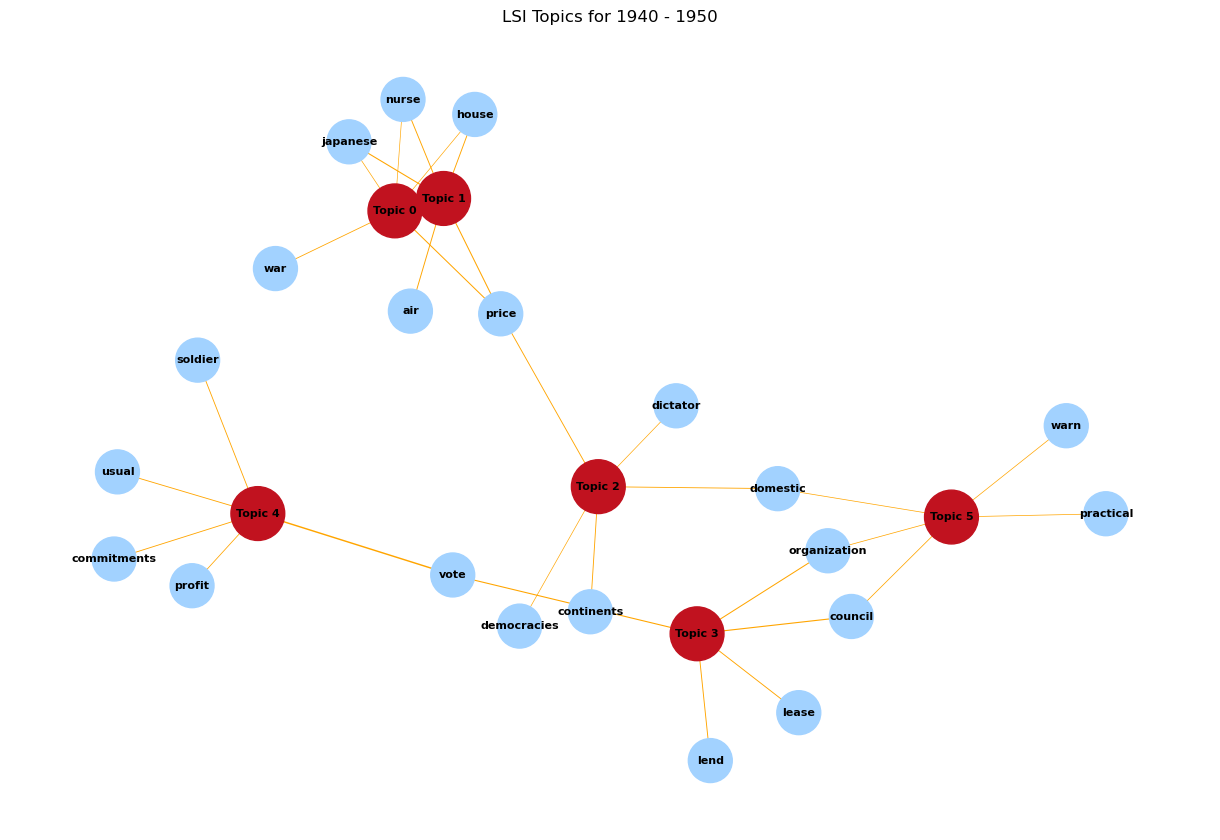

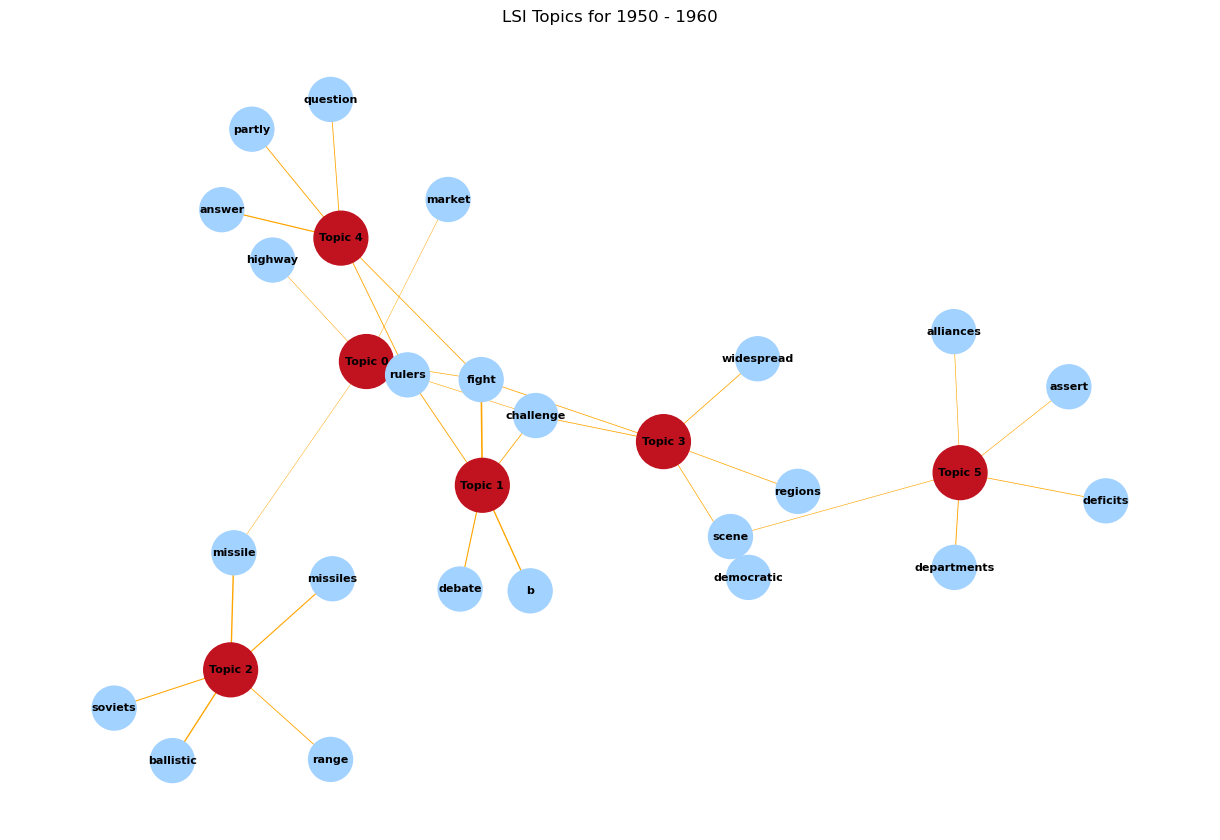

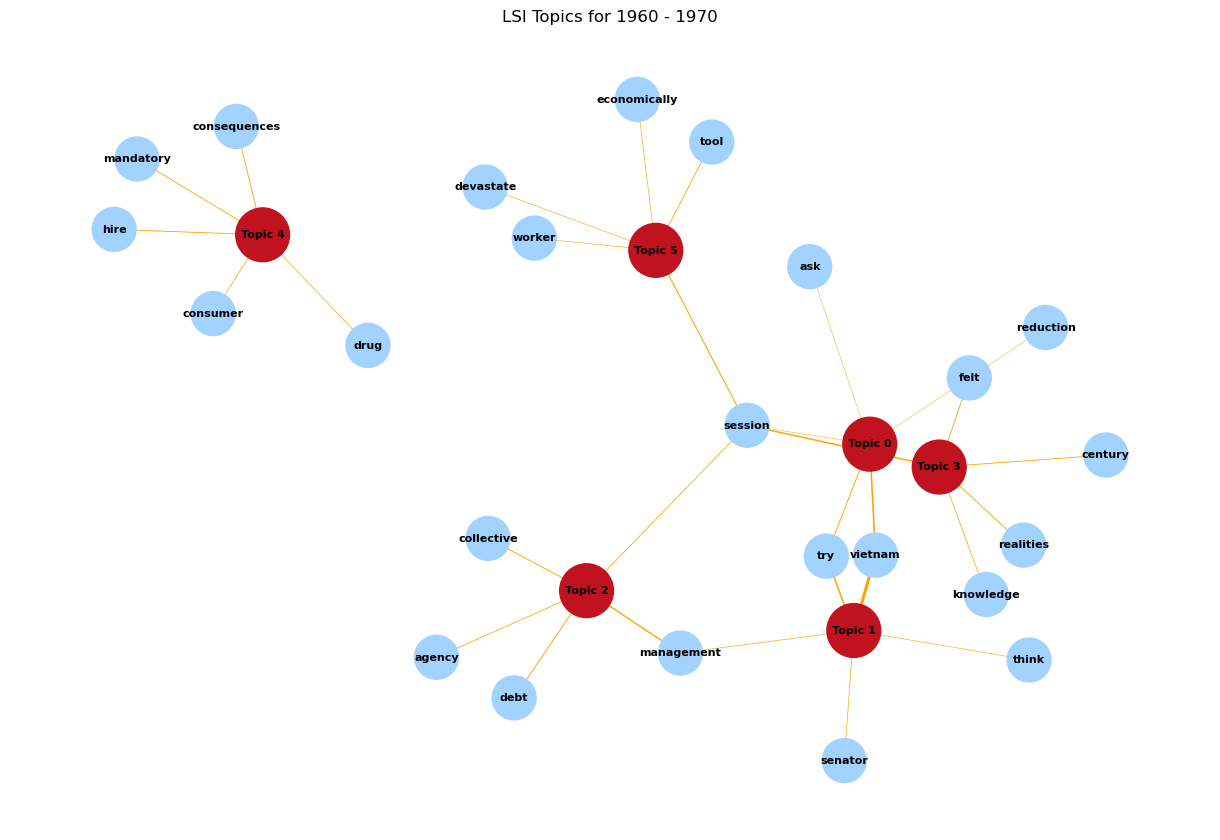

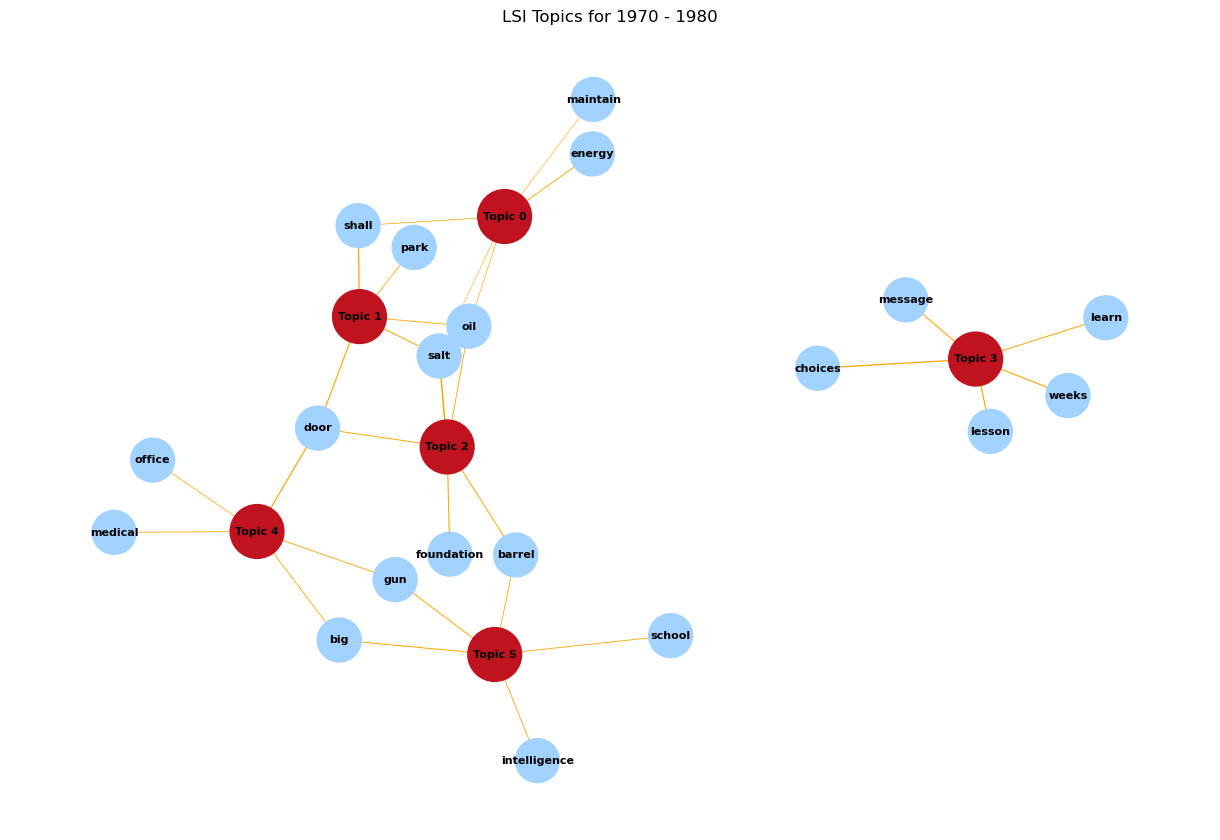

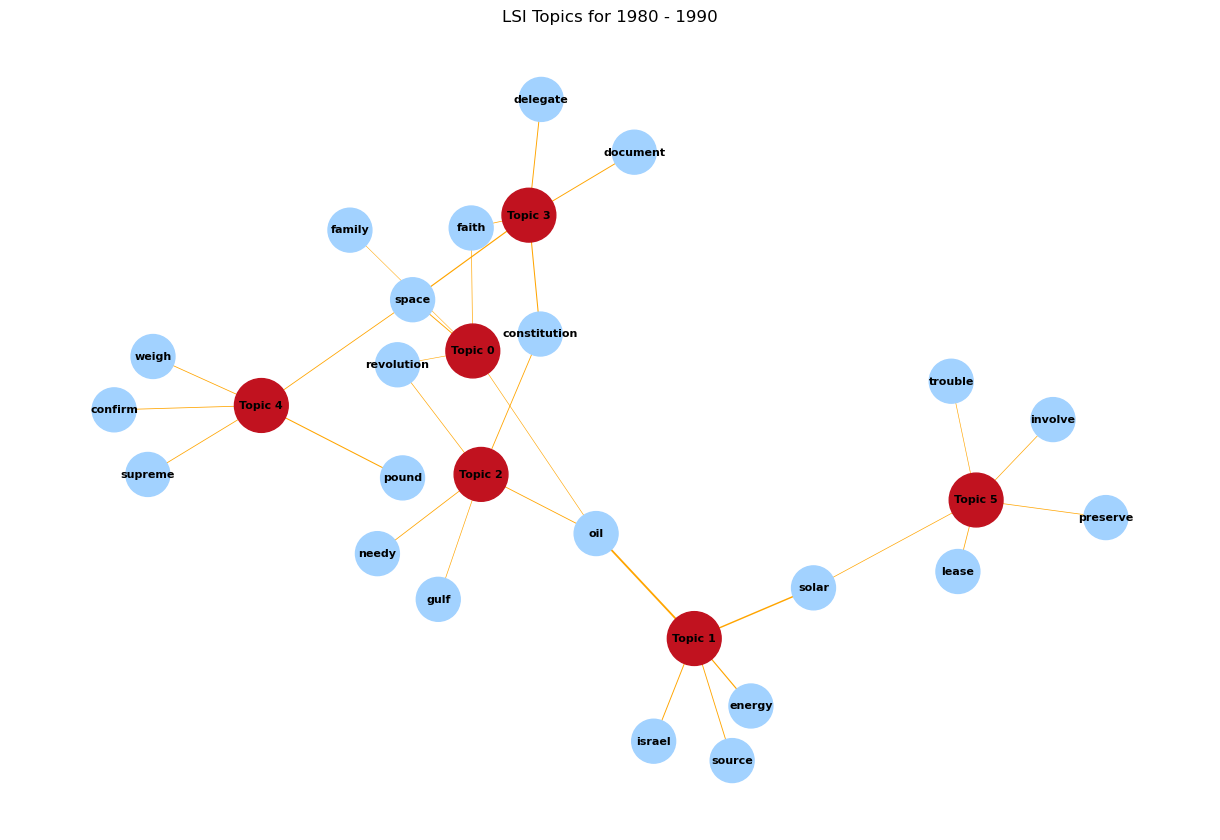

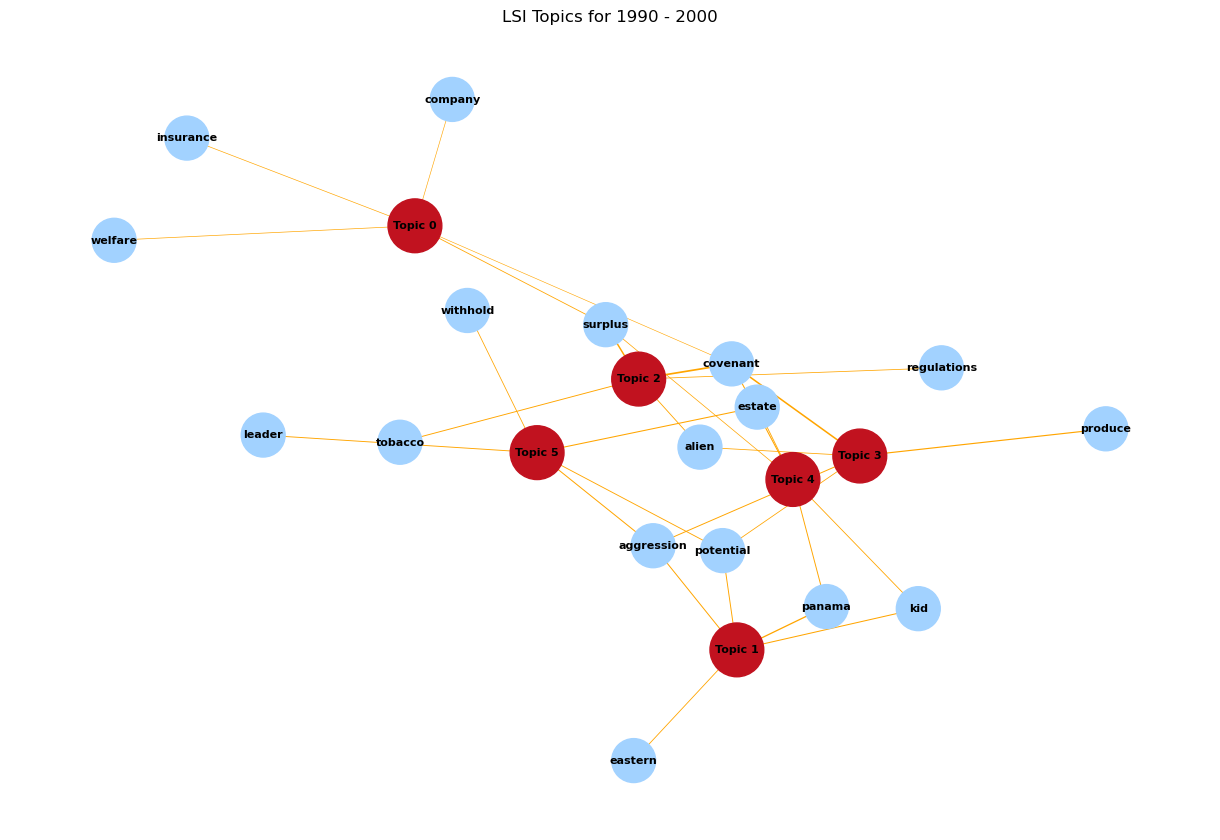

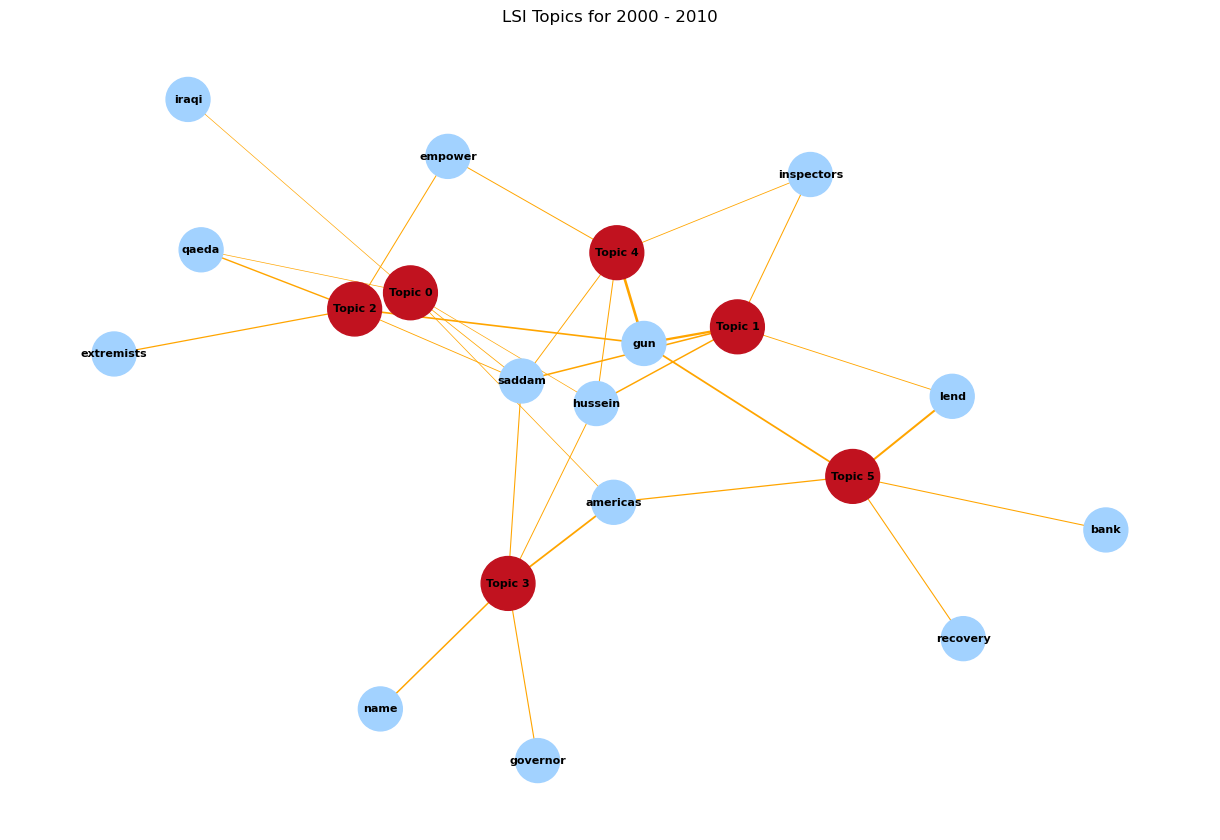

In [187]:
# plot the graph for the topics
for decade, topics in topics_decade_lsi.items():
    plot_topic_network(
        topics, title=f"LSI Topics for {decade} - {decade + 10}", edge_scaler=5
    )

In [156]:
topics_decade_lda

{1900: {0: [('murder', 0.00056641205),
   ('personal', 0.00050508766),
   ('night', 0.00050020654),
   ('conviction', 0.00049372634),
   ('crime', 0.00049013225)],
  1: [('lynch', 0.0012755473),
   ('color', 0.0012755261),
   ('criticism', 0.00093988515),
   ('mob', 0.000902106),
   ('railroad', 0.0008958346)],
  2: [('cable', 0.0015468339),
   ('tariff', 0.00084185606),
   ('reciprocity', 0.0007645881),
   ('philippine', 0.0007645218),
   ('cuba', 0.00071520155)],
  3: [('legations', 0.0012618223),
   ('peking', 0.0010997367),
   ('chinese', 0.0009808252),
   ('legation', 0.00093779253),
   ('exhibit', 0.0009376497)],
  4: [('railroad', 0.0011782999),
   ('fortunate', 0.00071720494),
   ('rat', 0.00071185664),
   ('rate', 0.00069994986),
   ('expose', 0.0006682424)],
  5: [('conference', 0.000566174),
   ('invitation', 0.00048547075),
   ('republics', 0.0004803394),
   ('liberia', 0.0004716714),
   ('britain', 0.00045431536)],
  6: [('strip', 0.0005583206),
   ('surplus', 0.0005477961

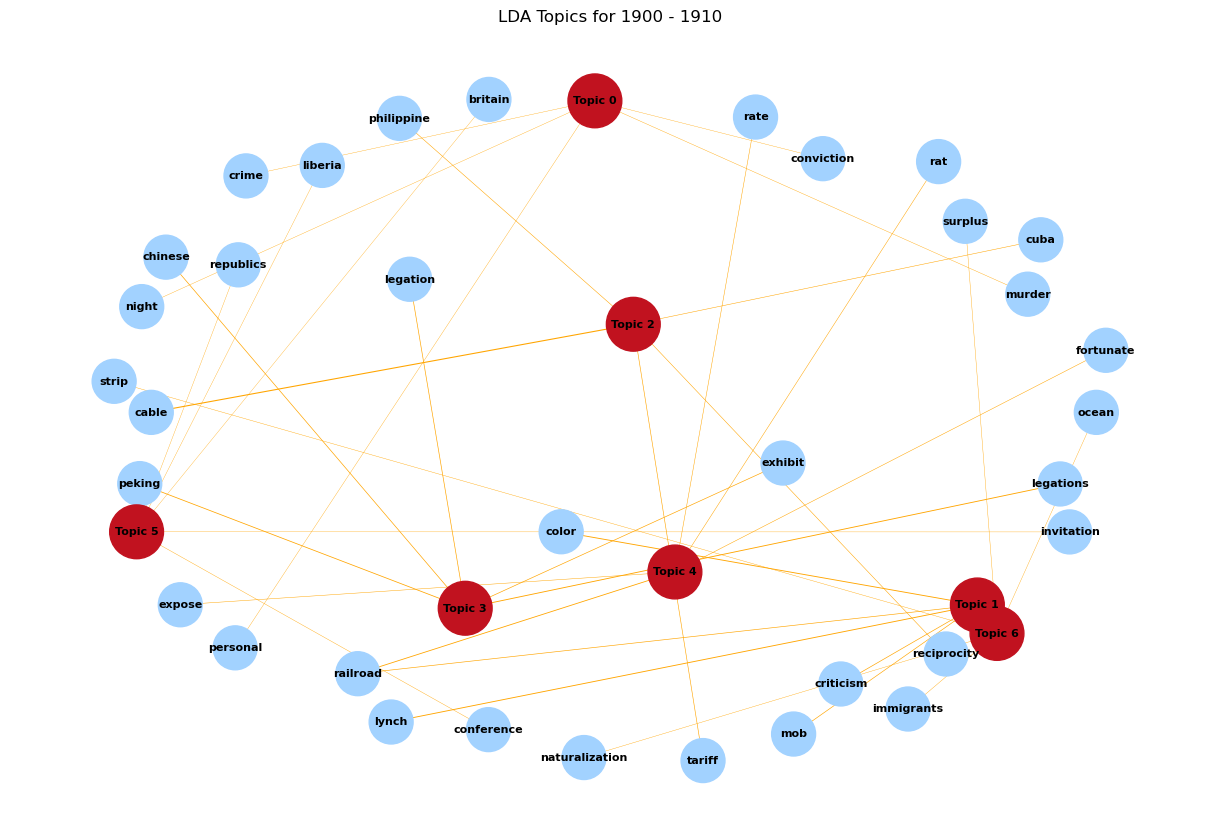

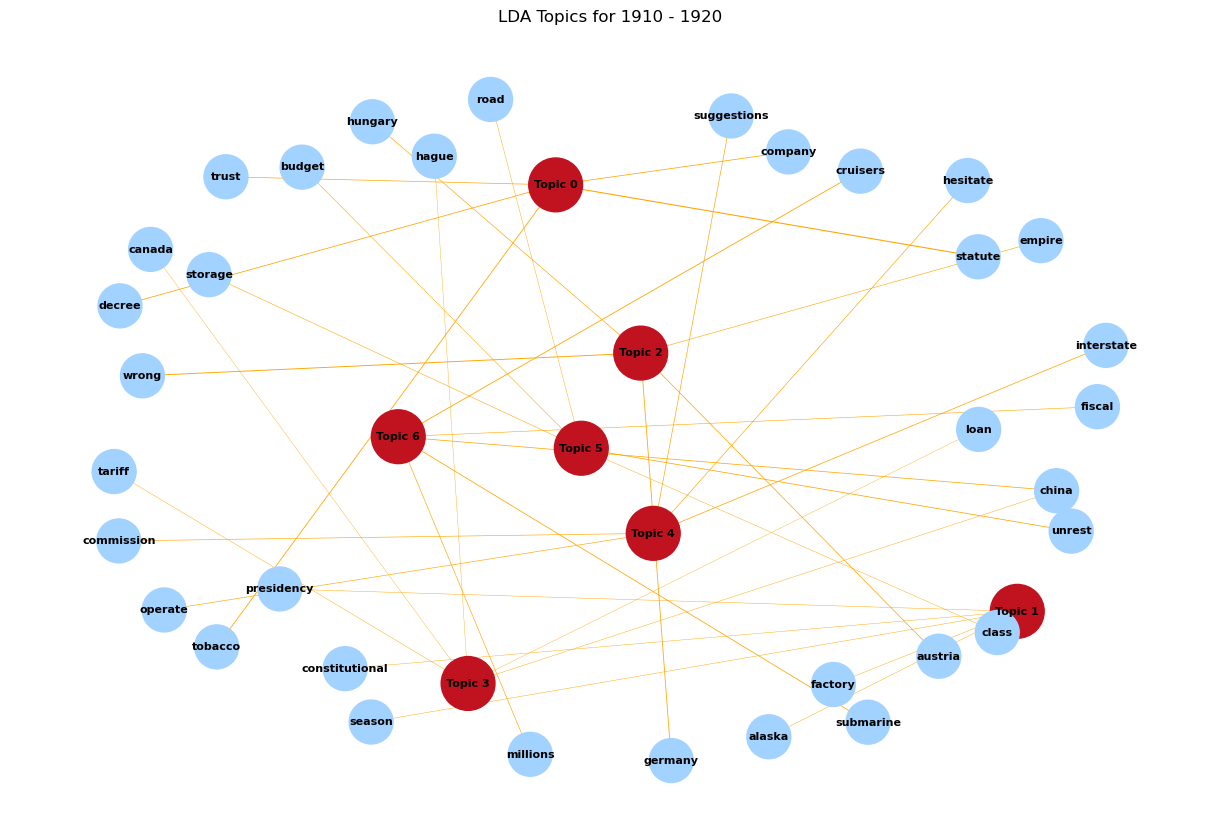

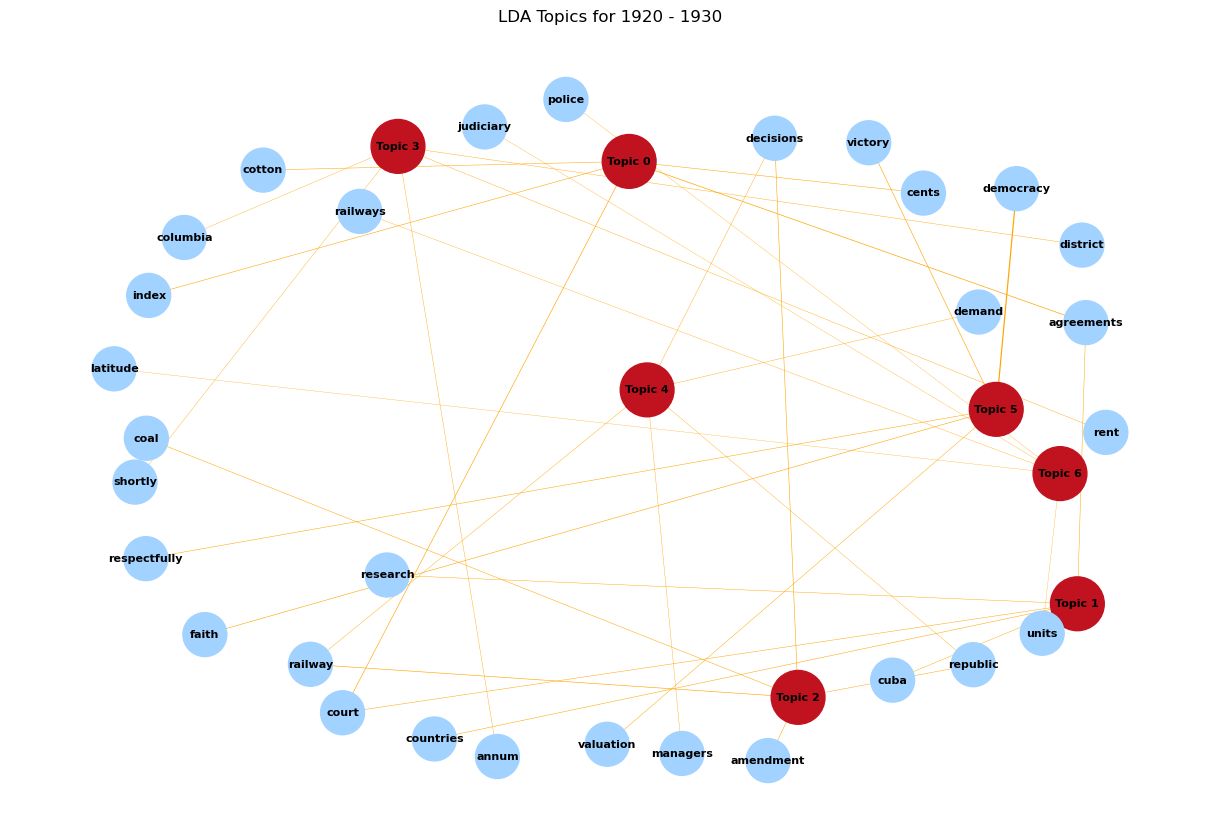

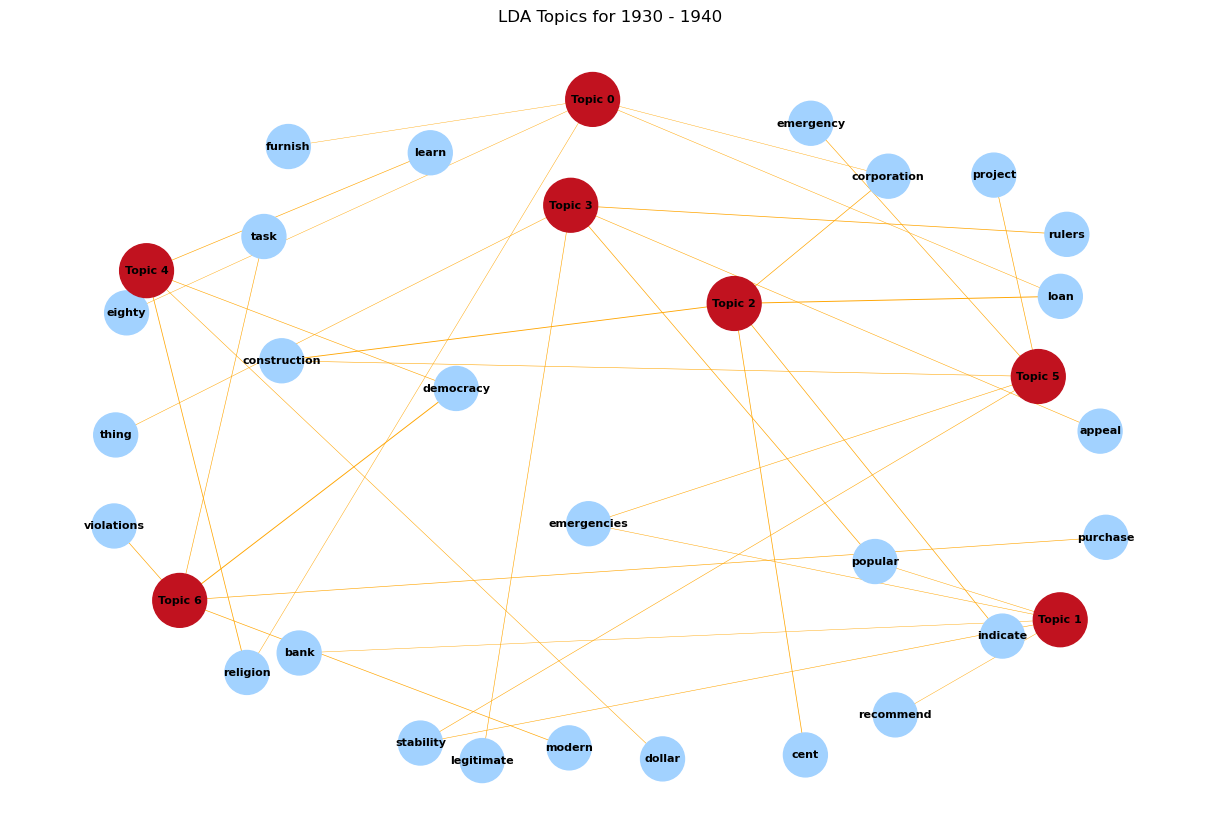

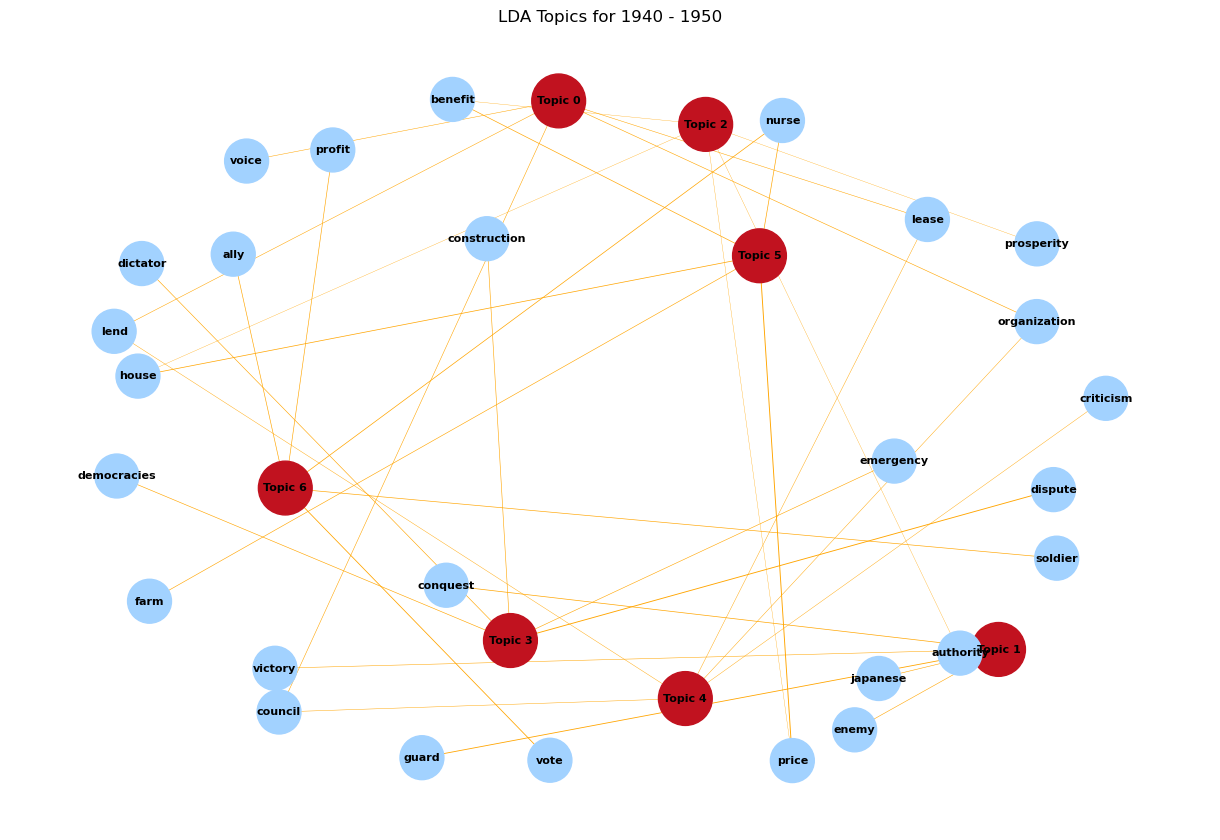

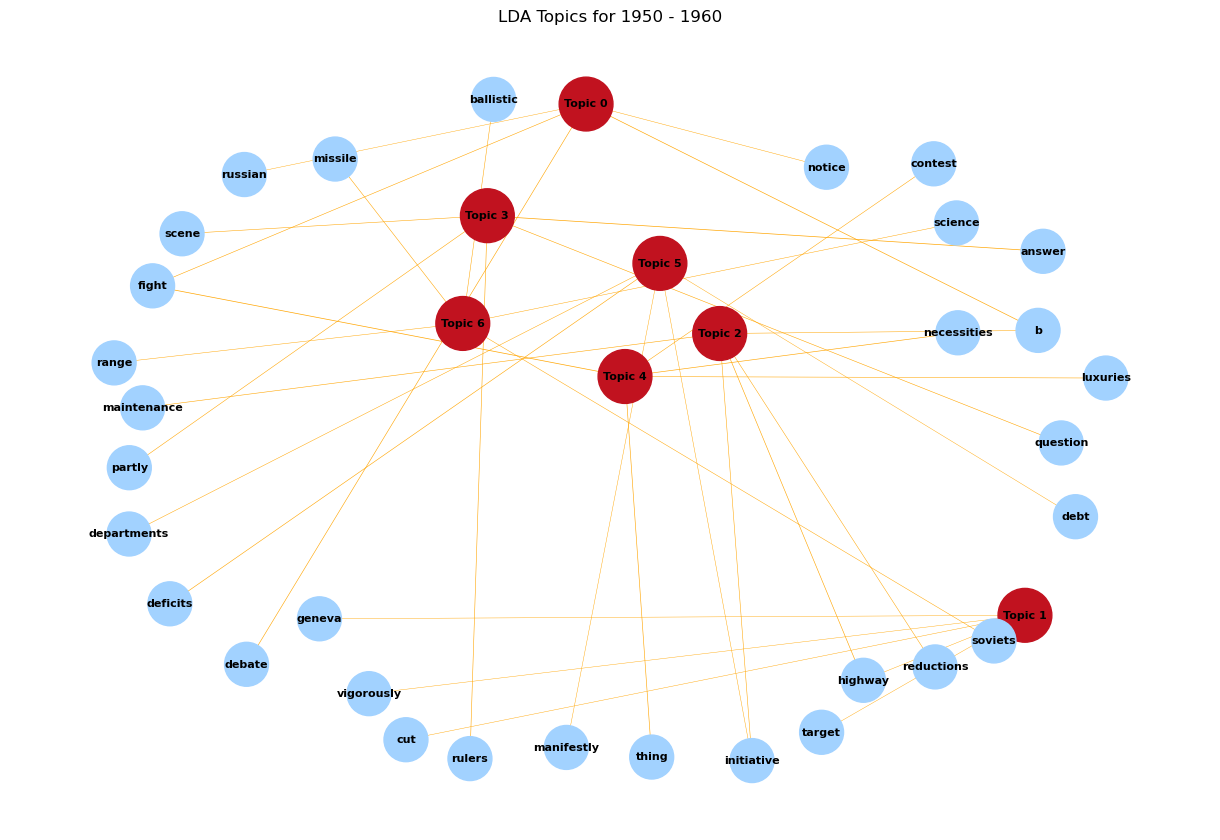

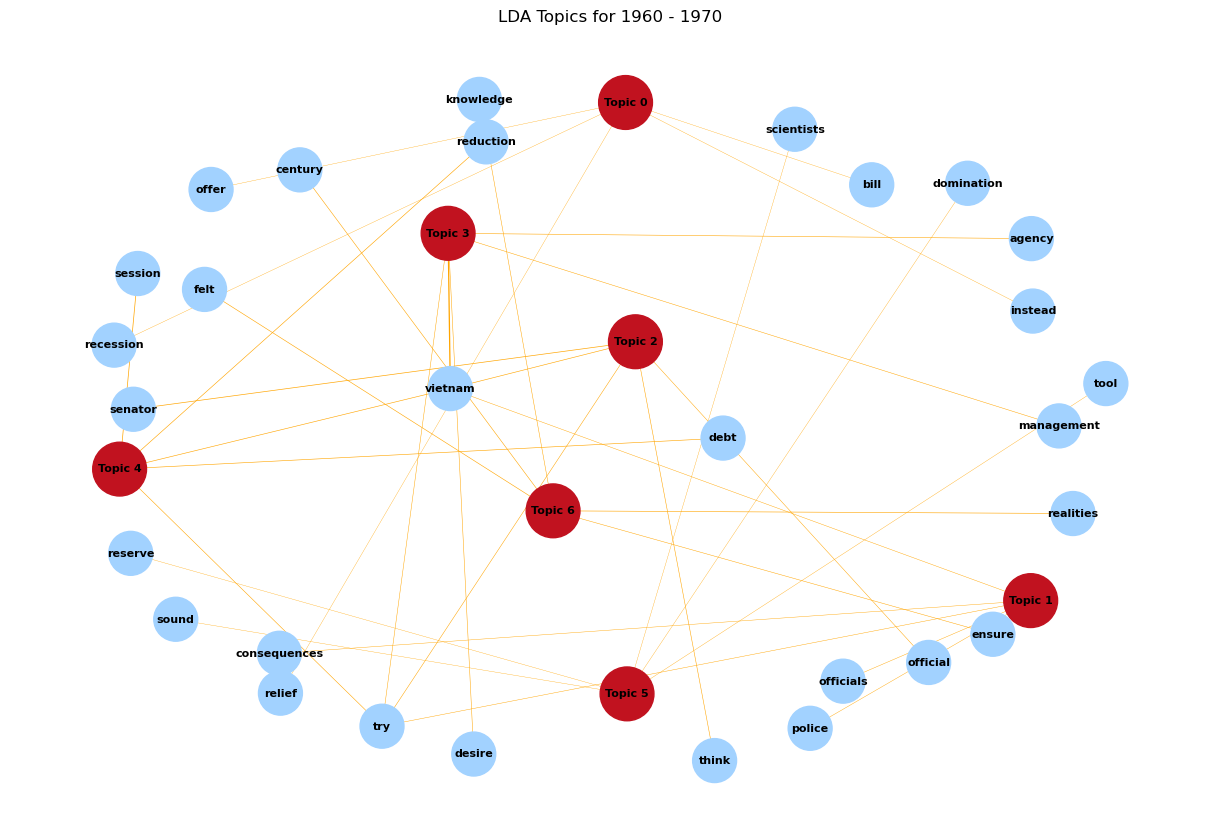

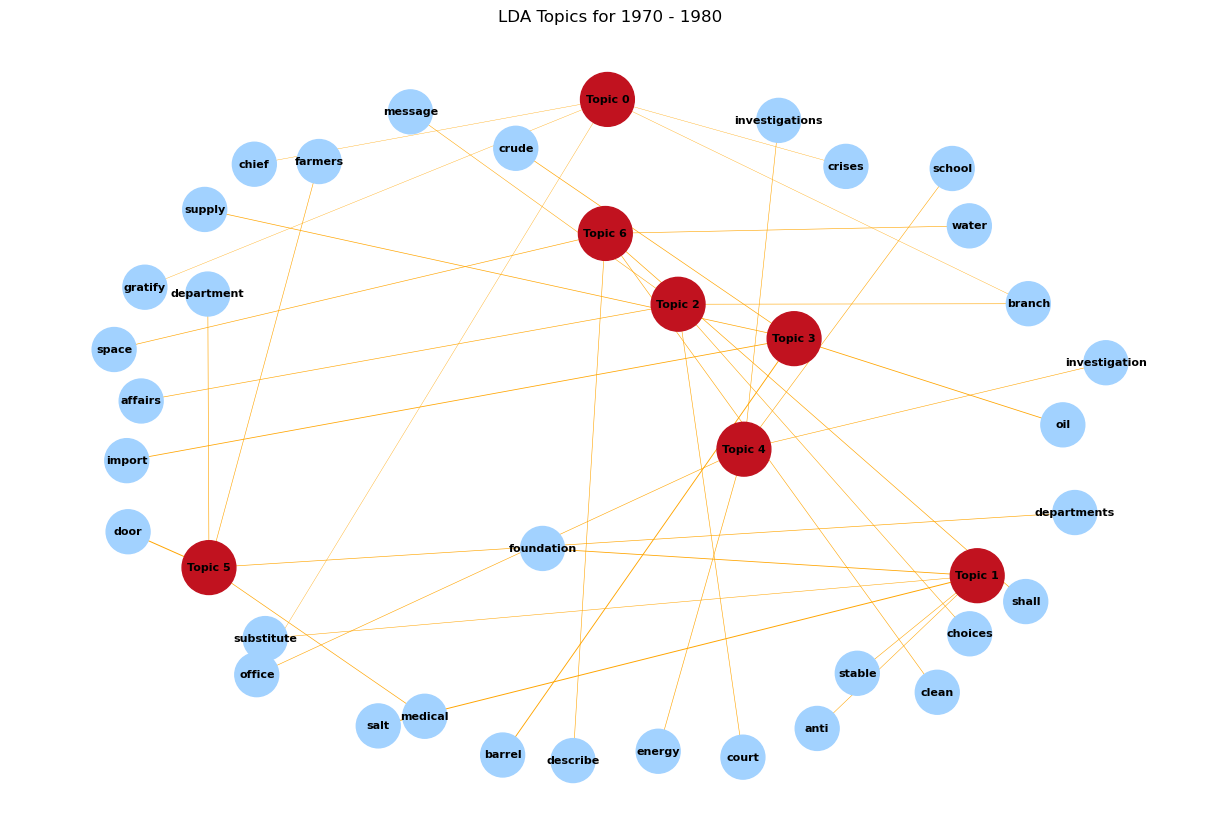

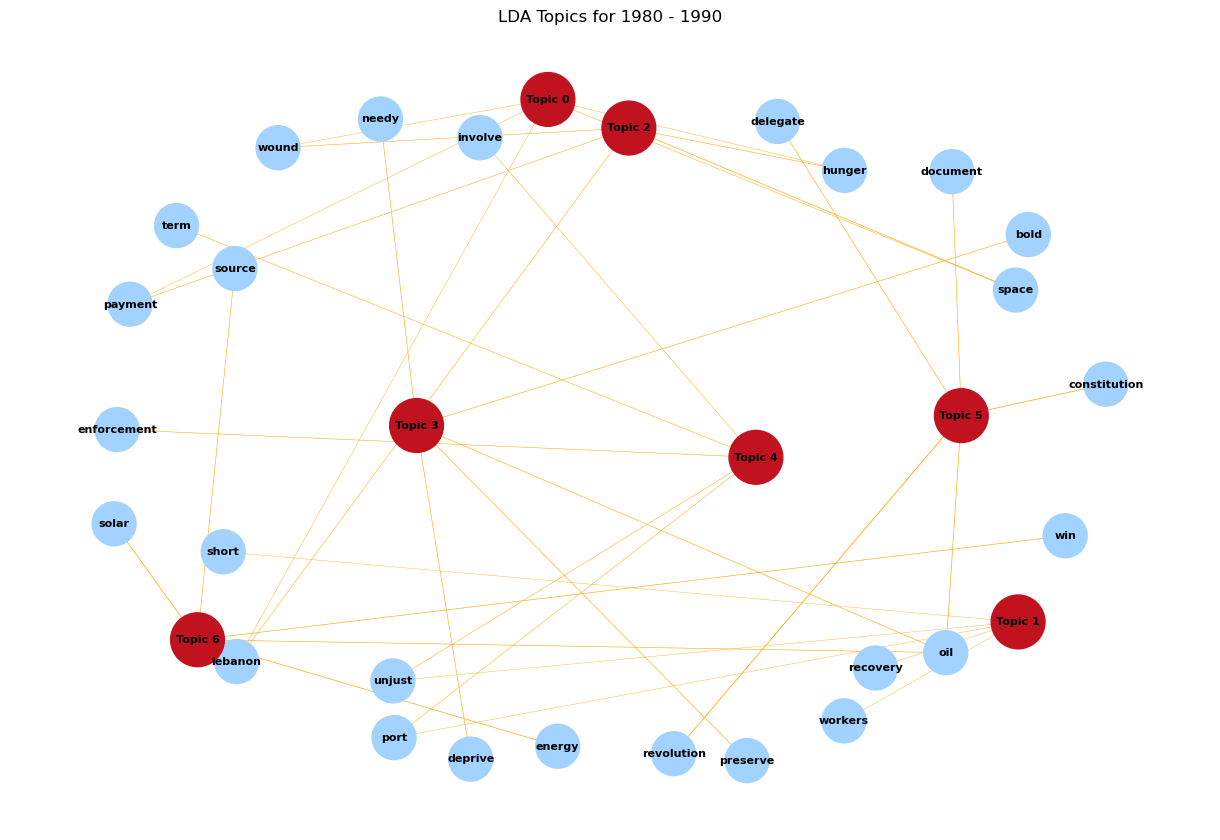

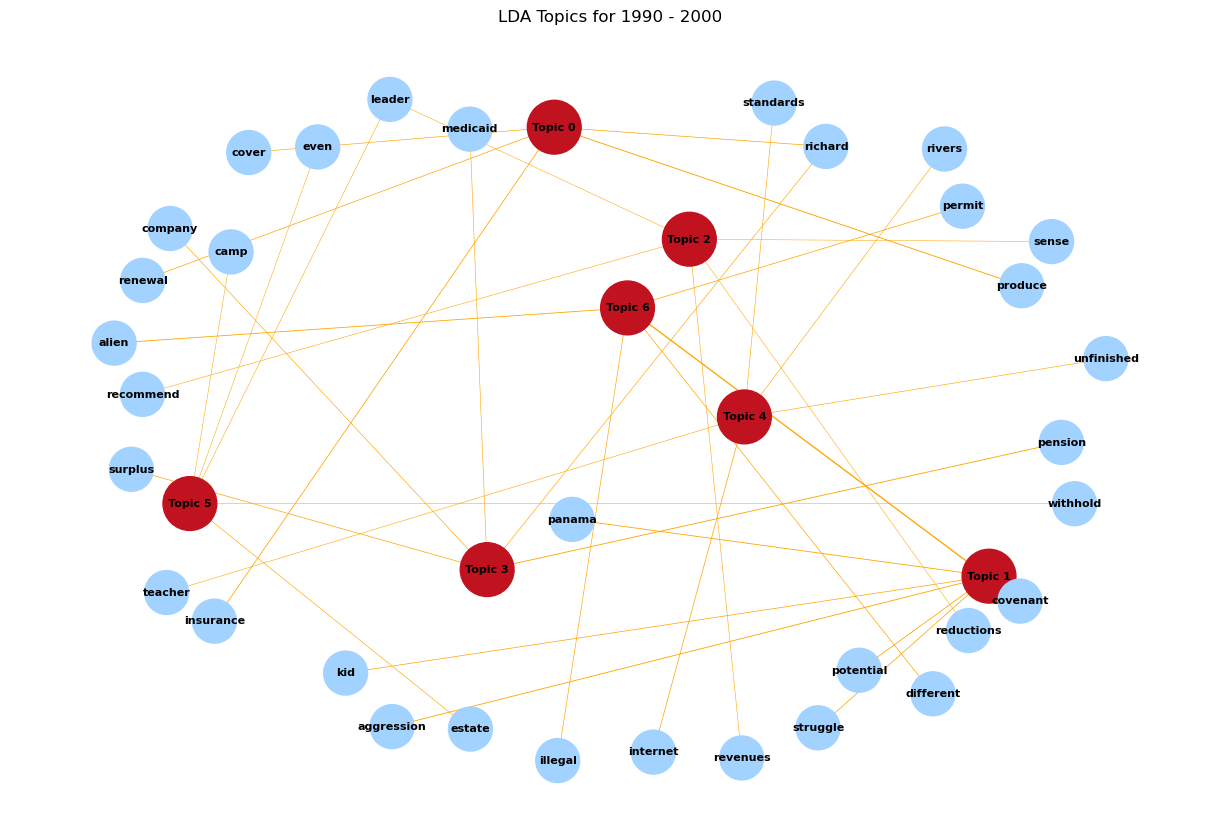

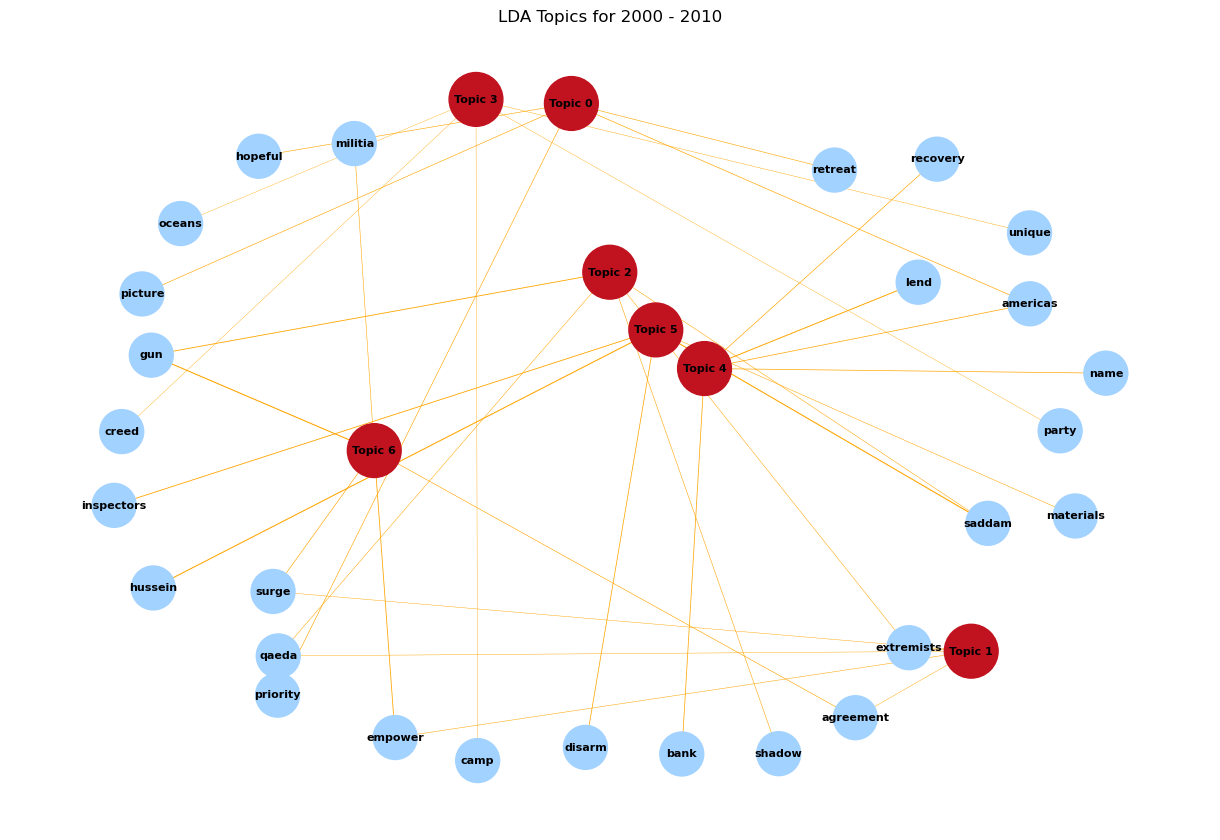

In [188]:
# plot the graph for the lda topics
for decade, topics in topics_decade_lda.items():
    plot_topic_network(
        topics, title=f"LDA Topics for {decade} - {decade + 10}", edge_scaler=500
    )

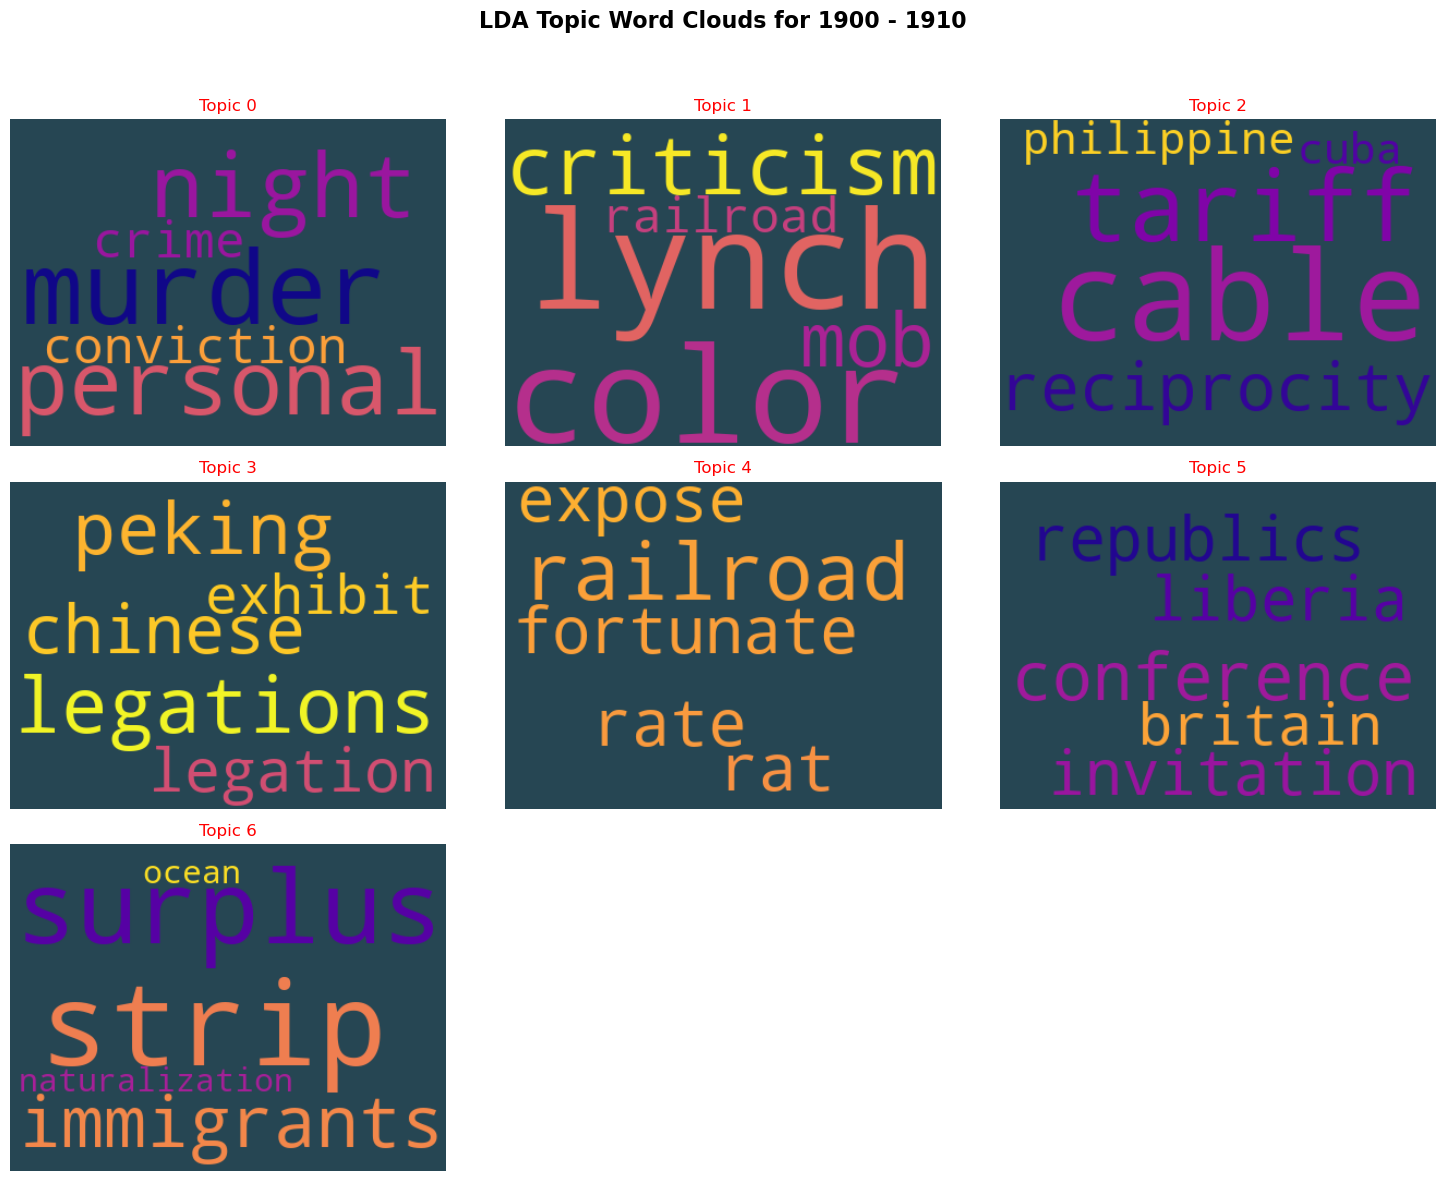

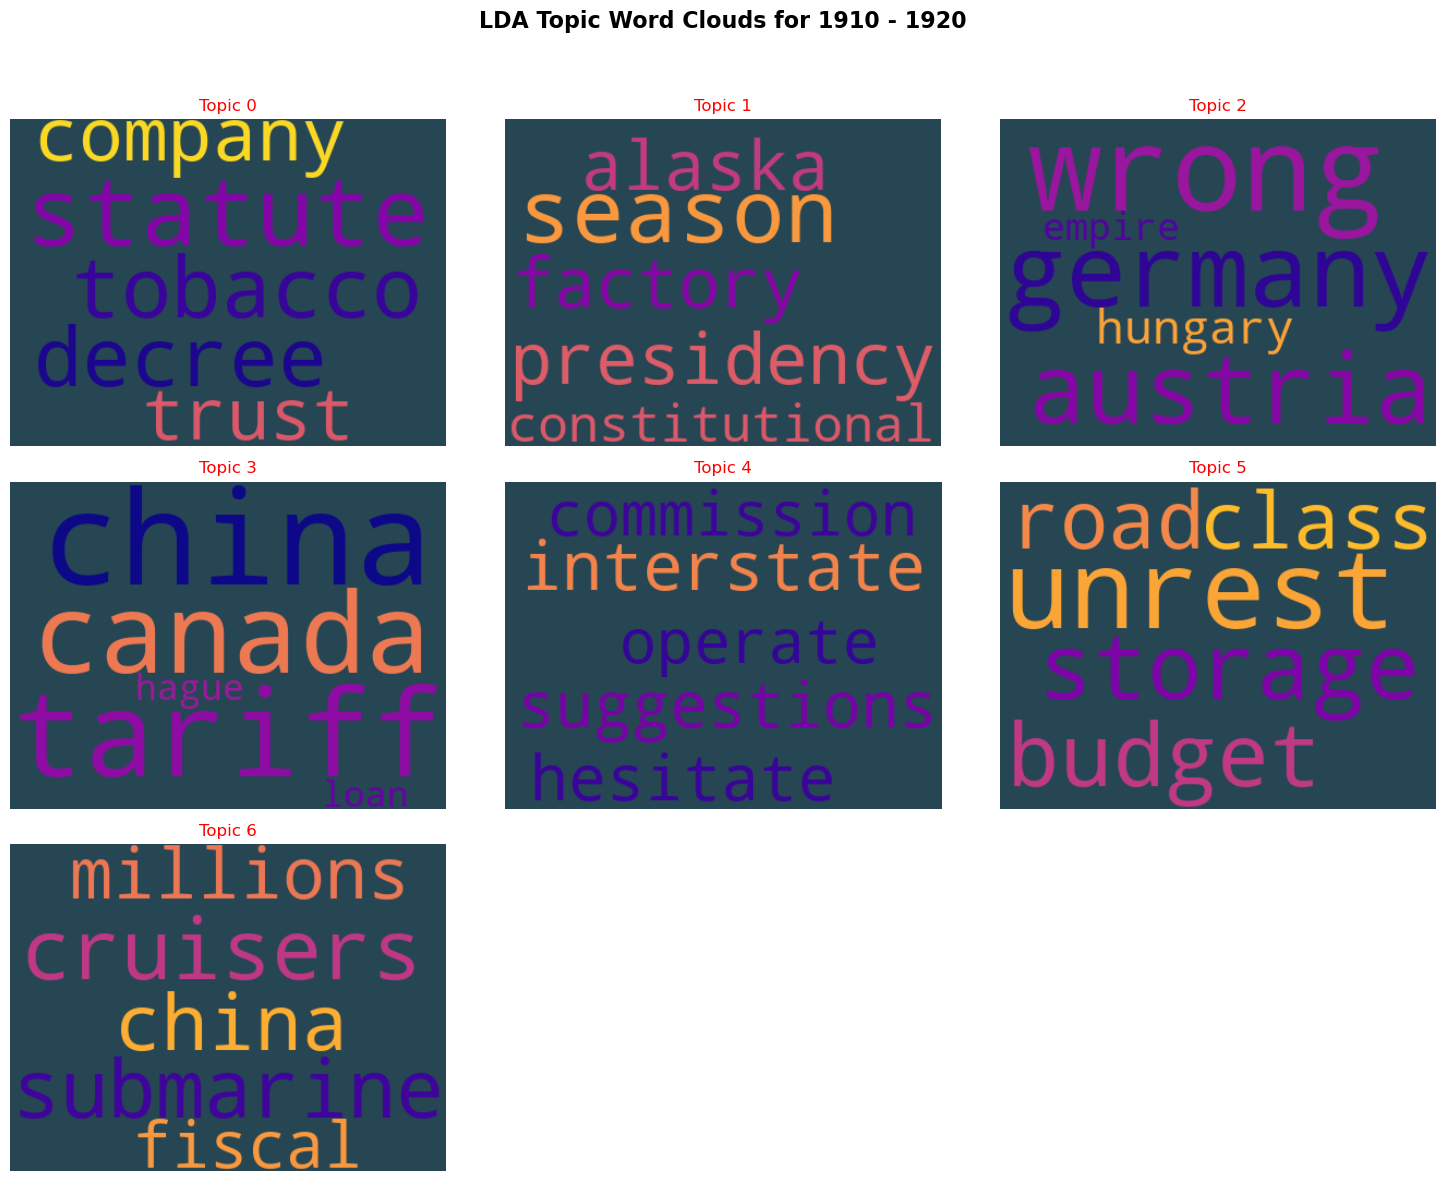

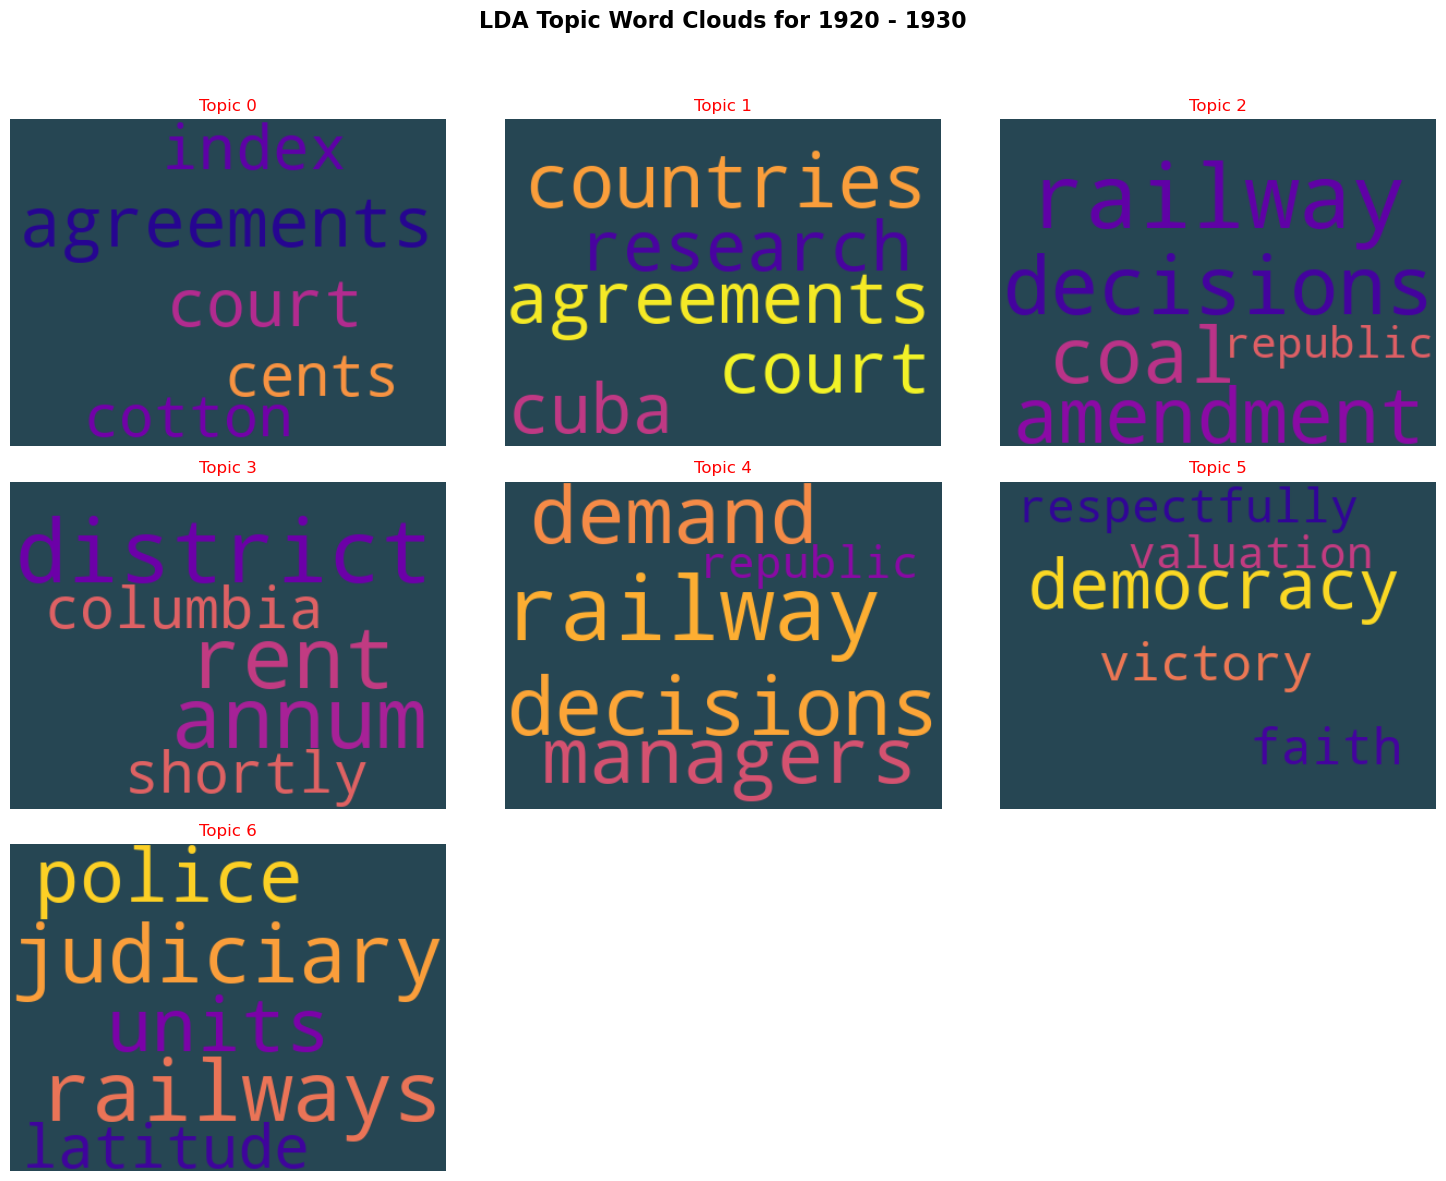

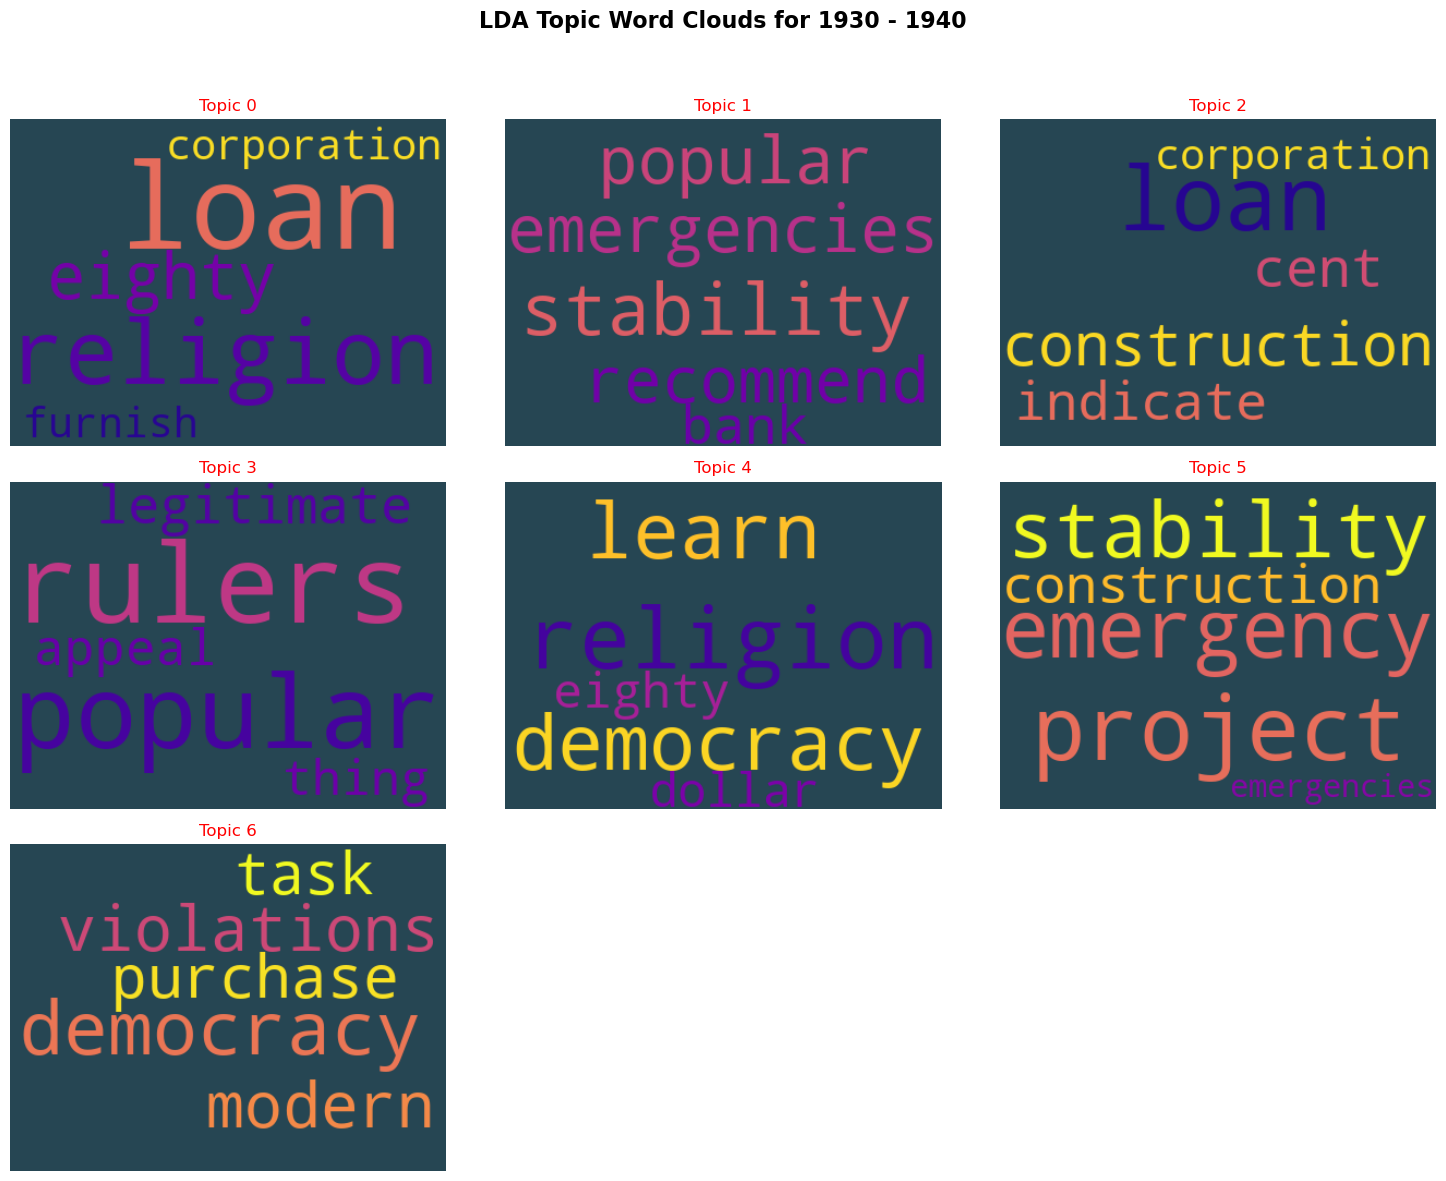

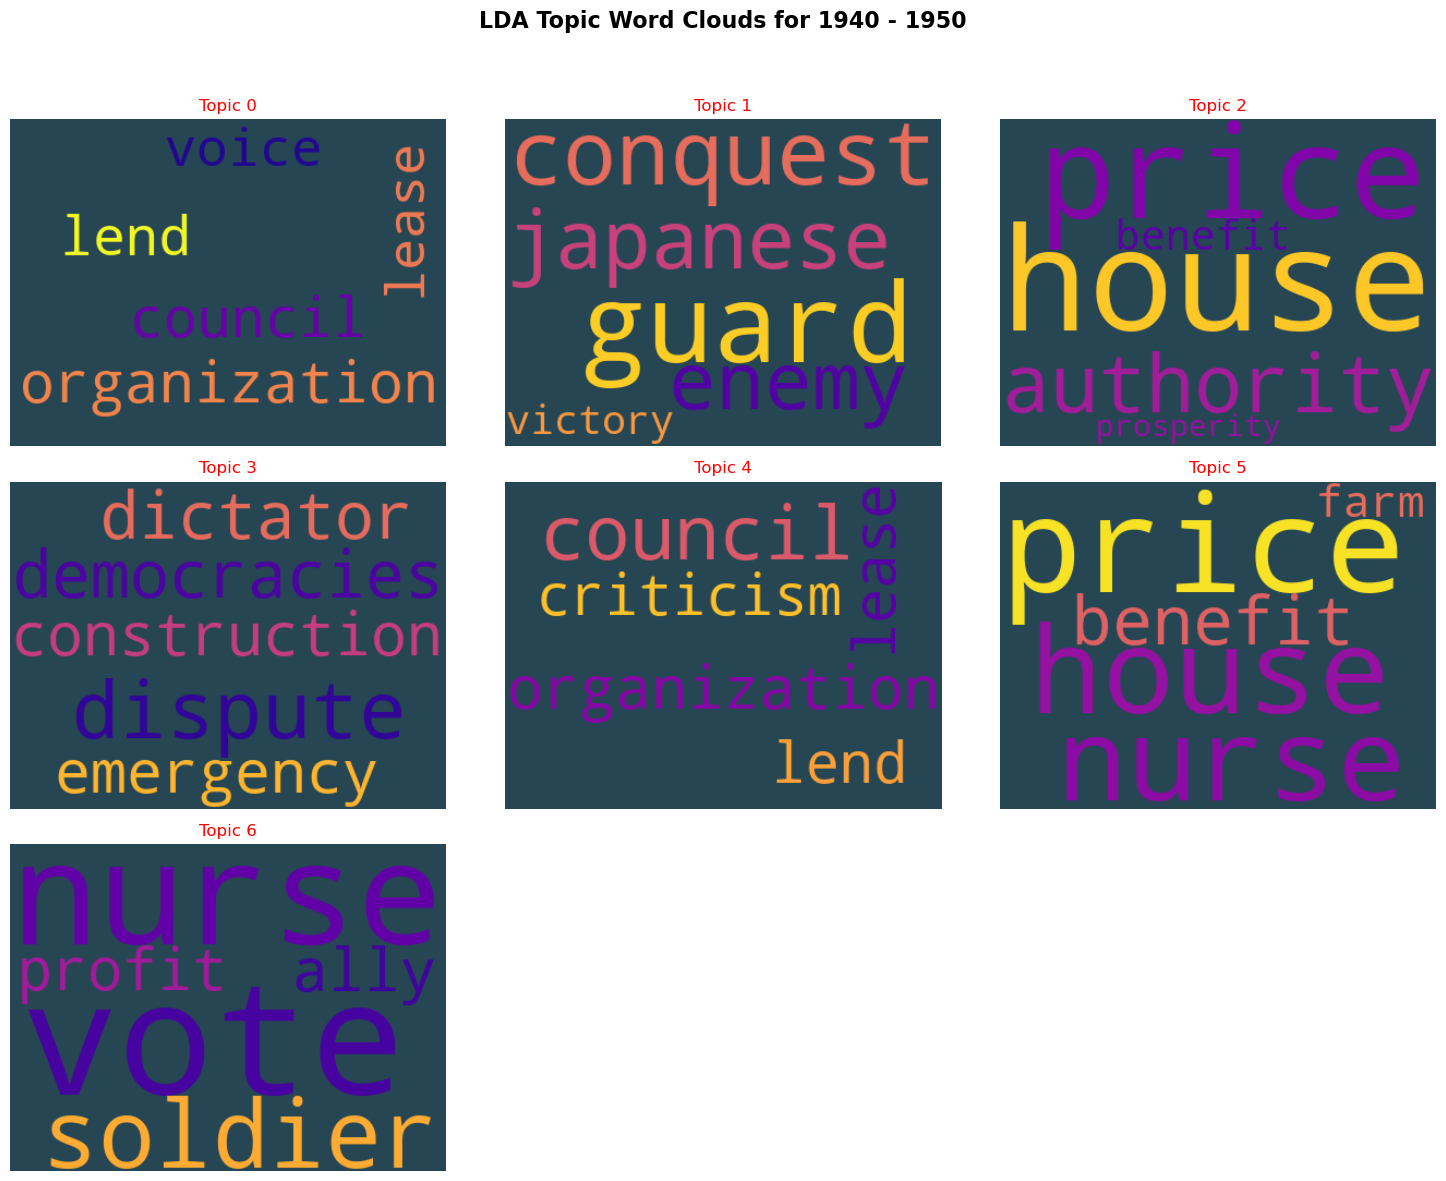

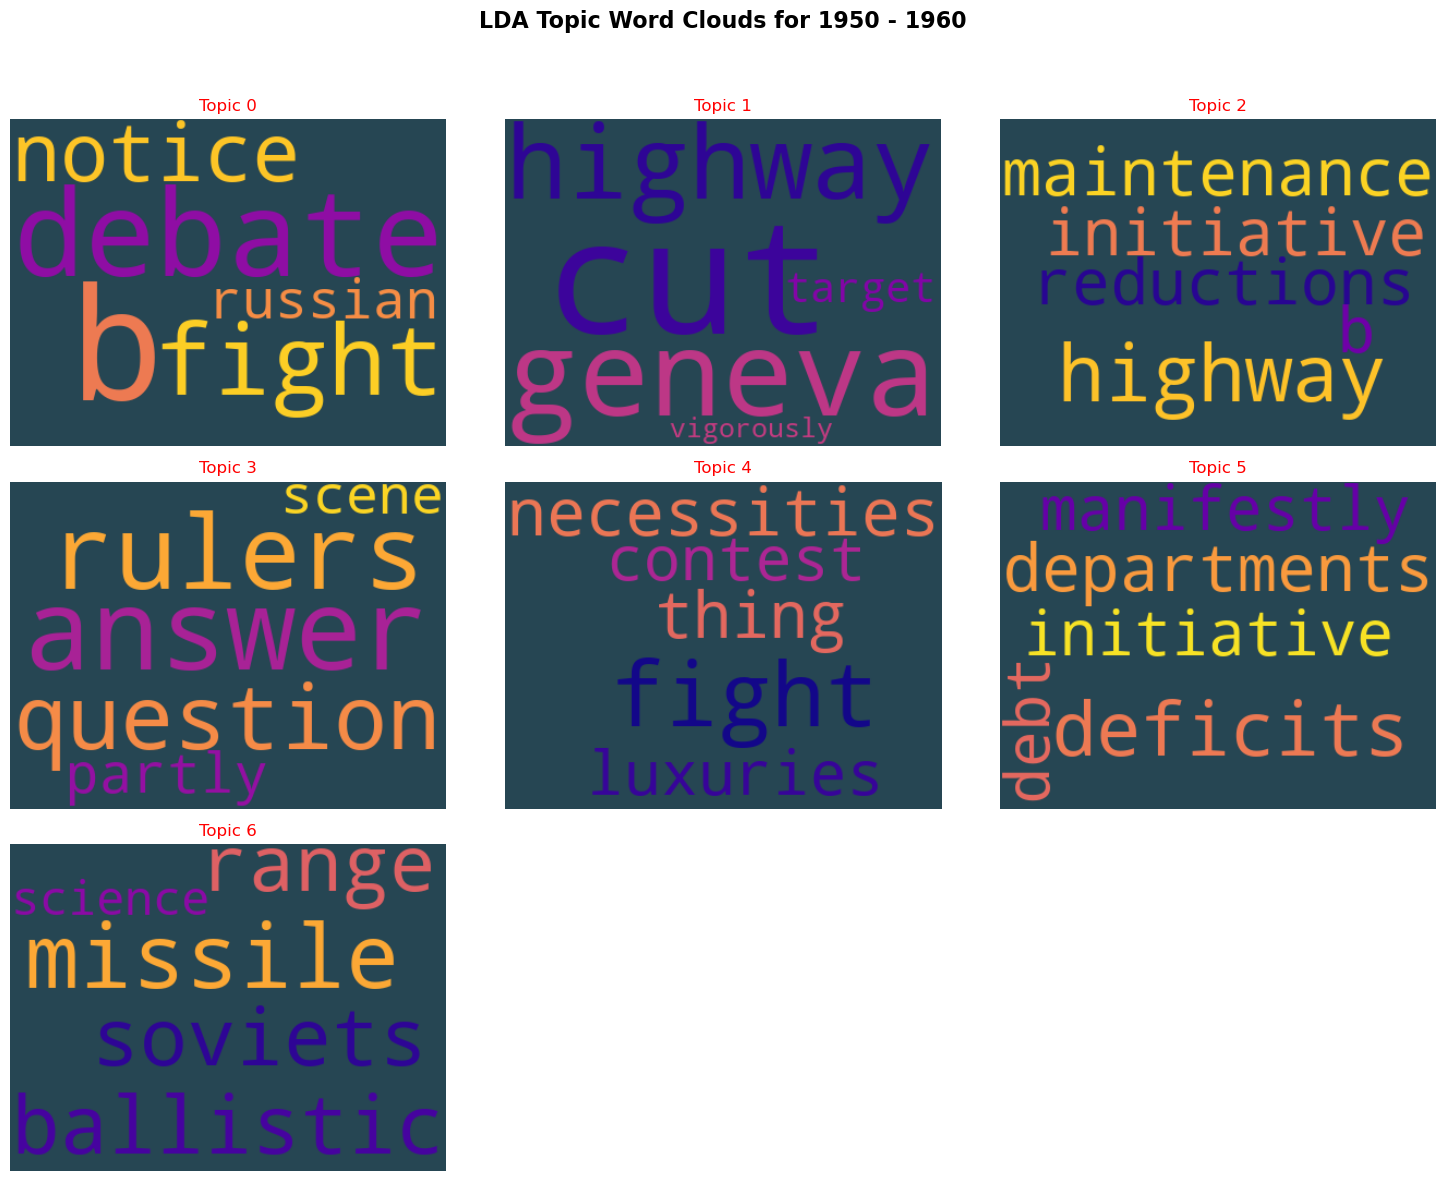

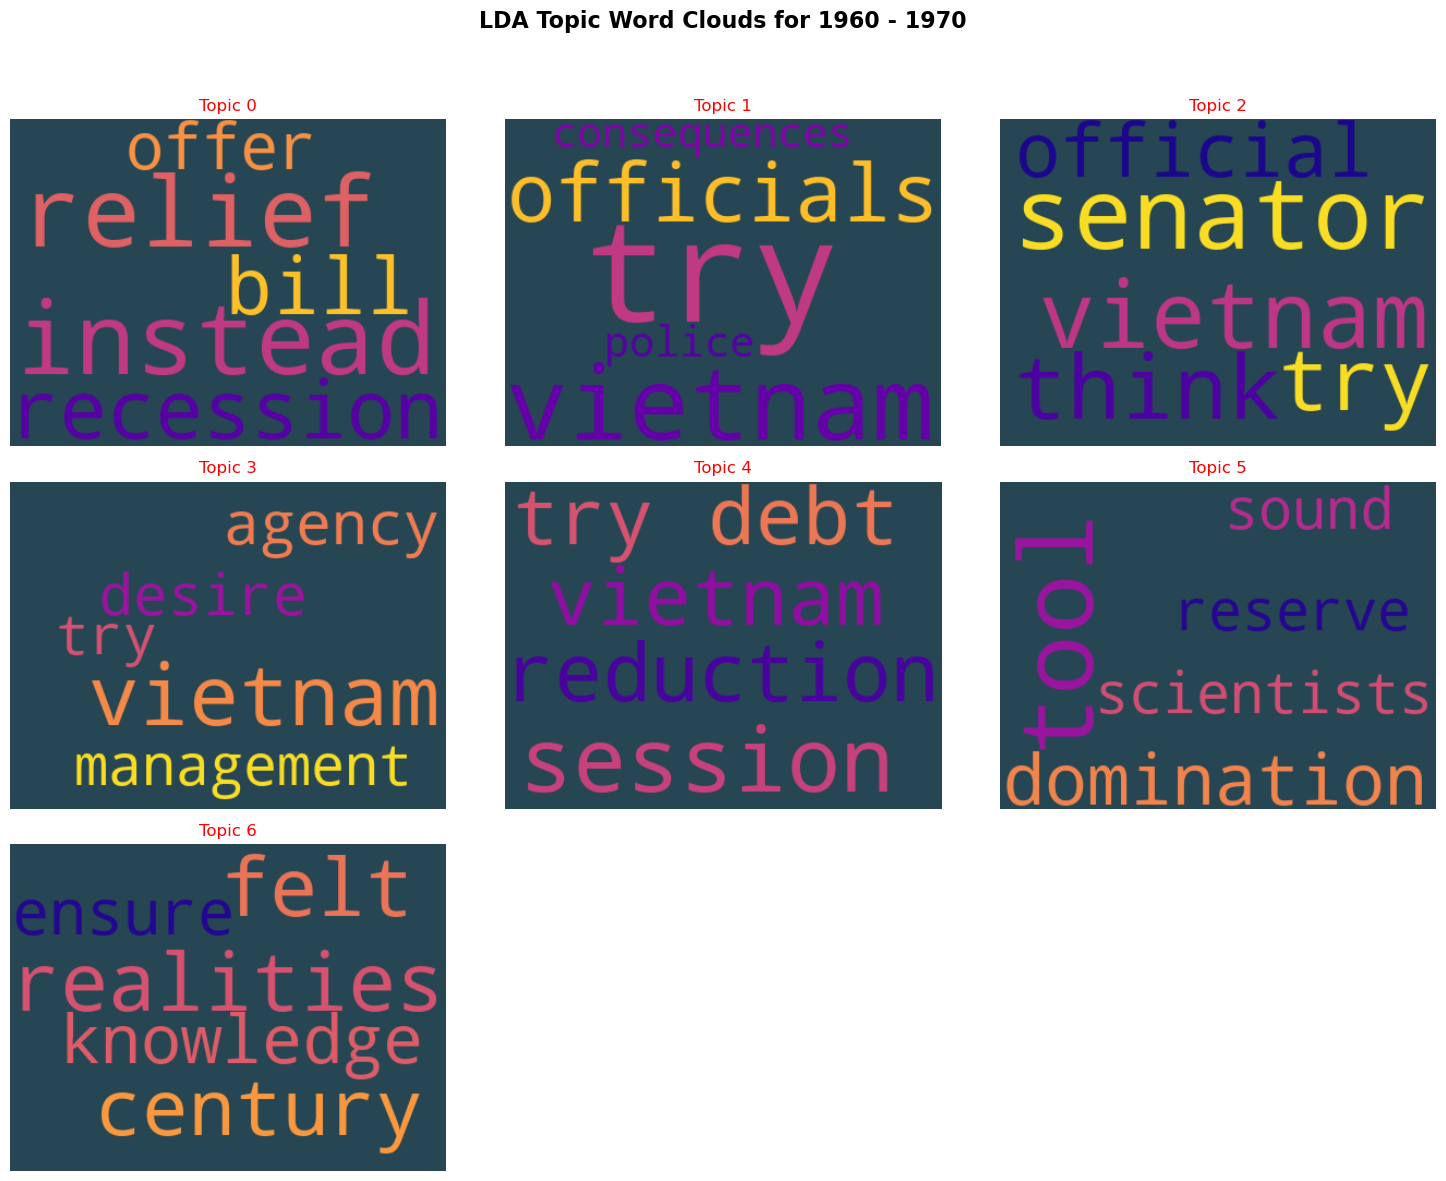

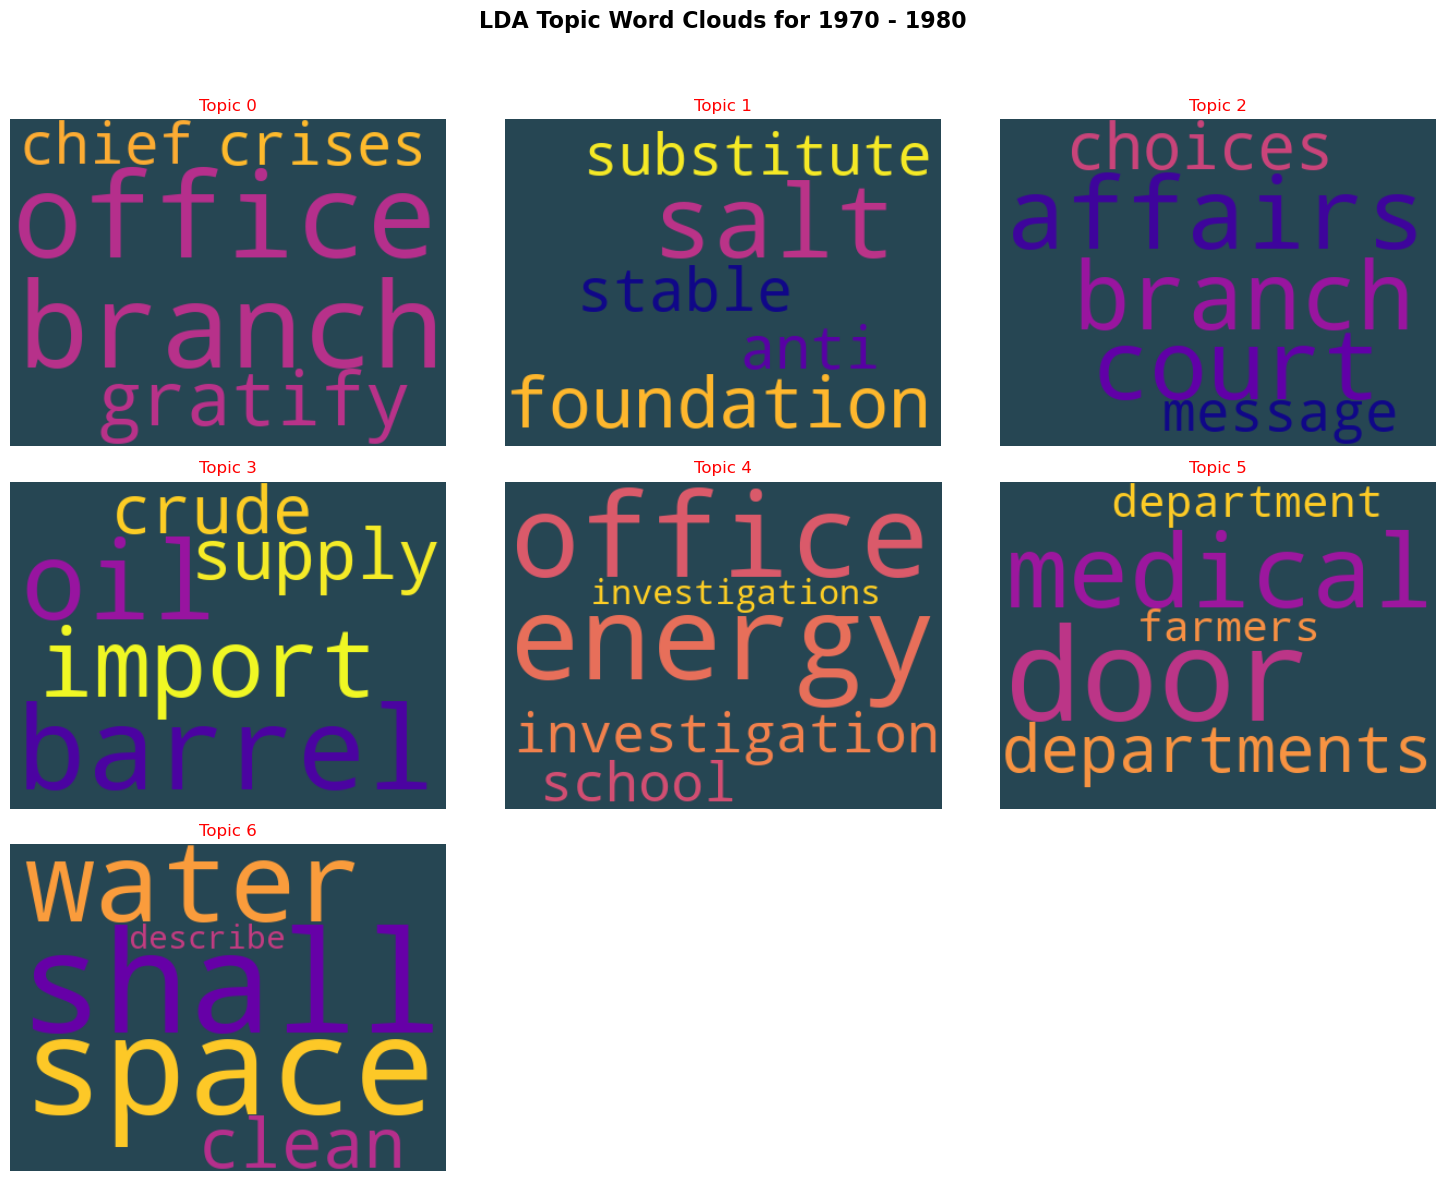

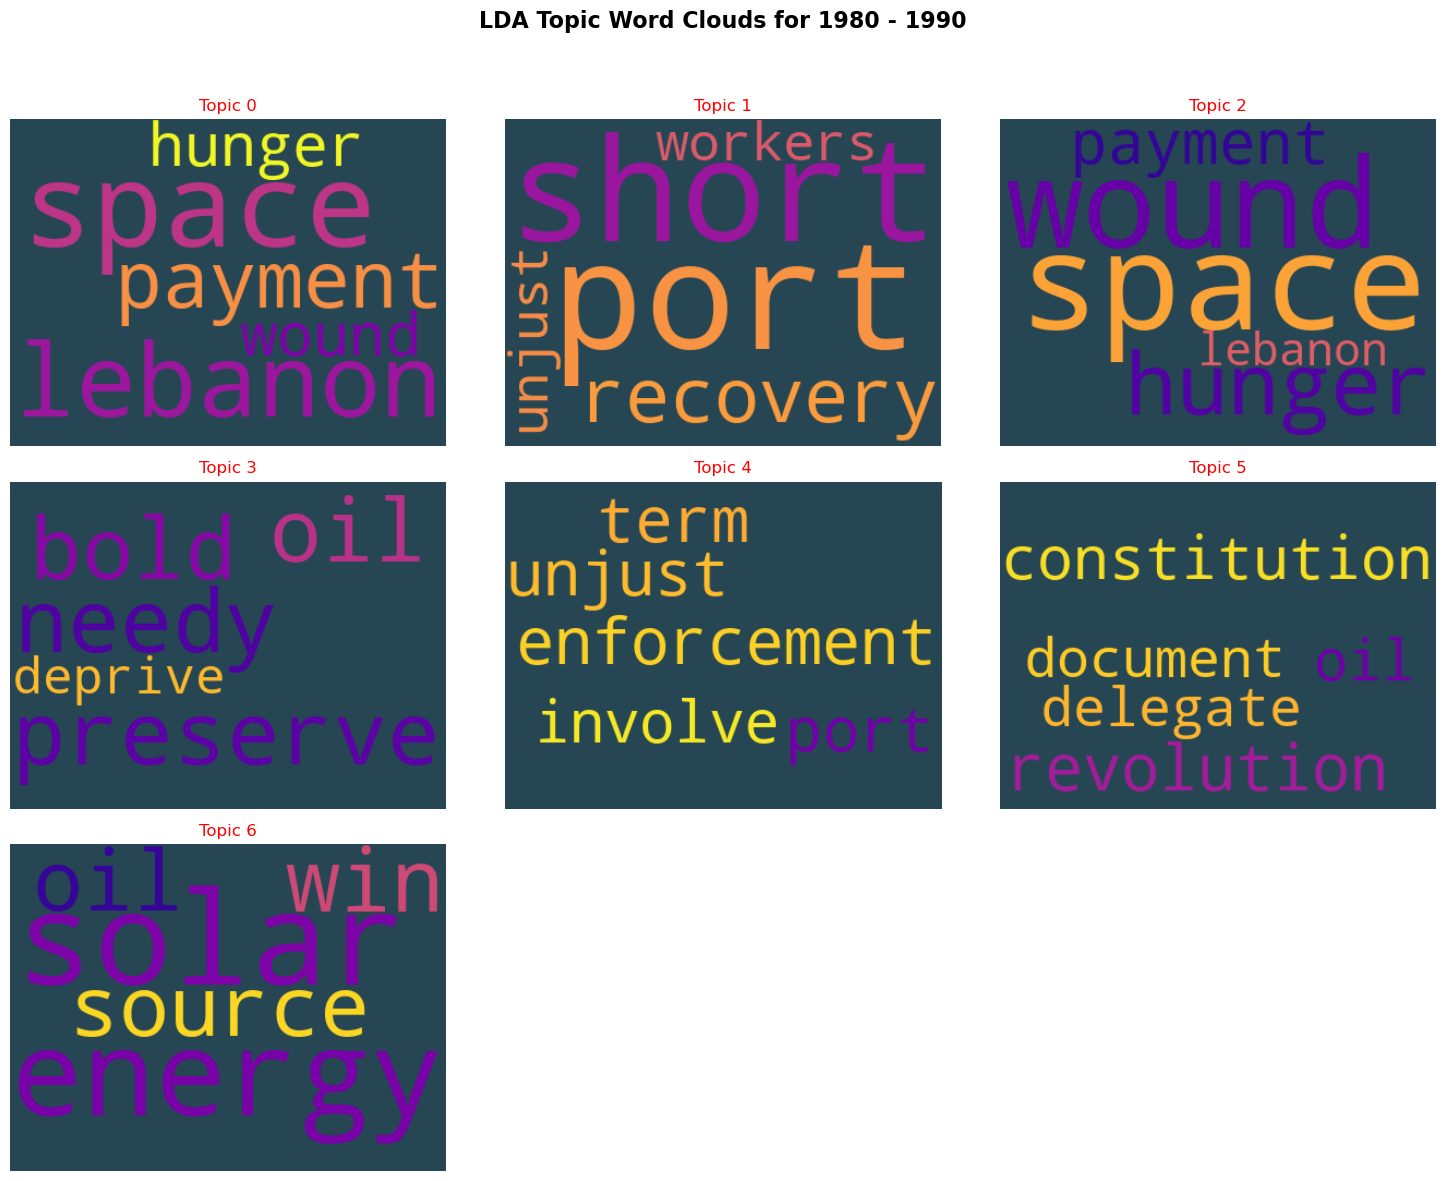

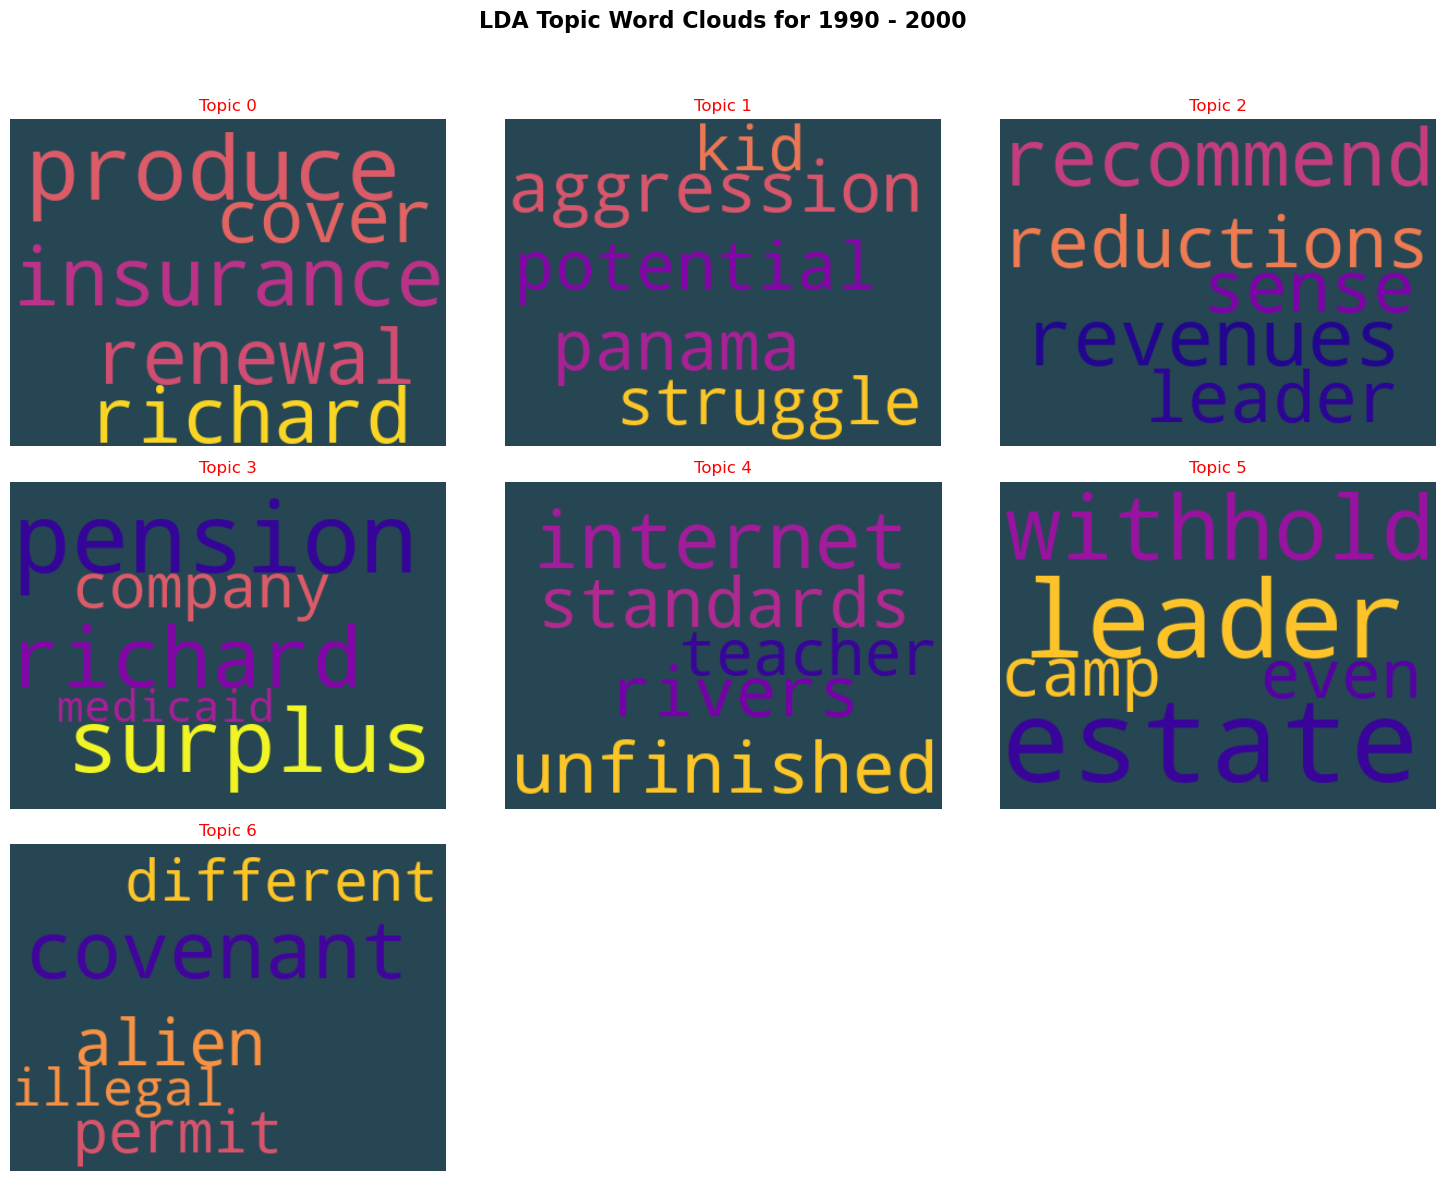

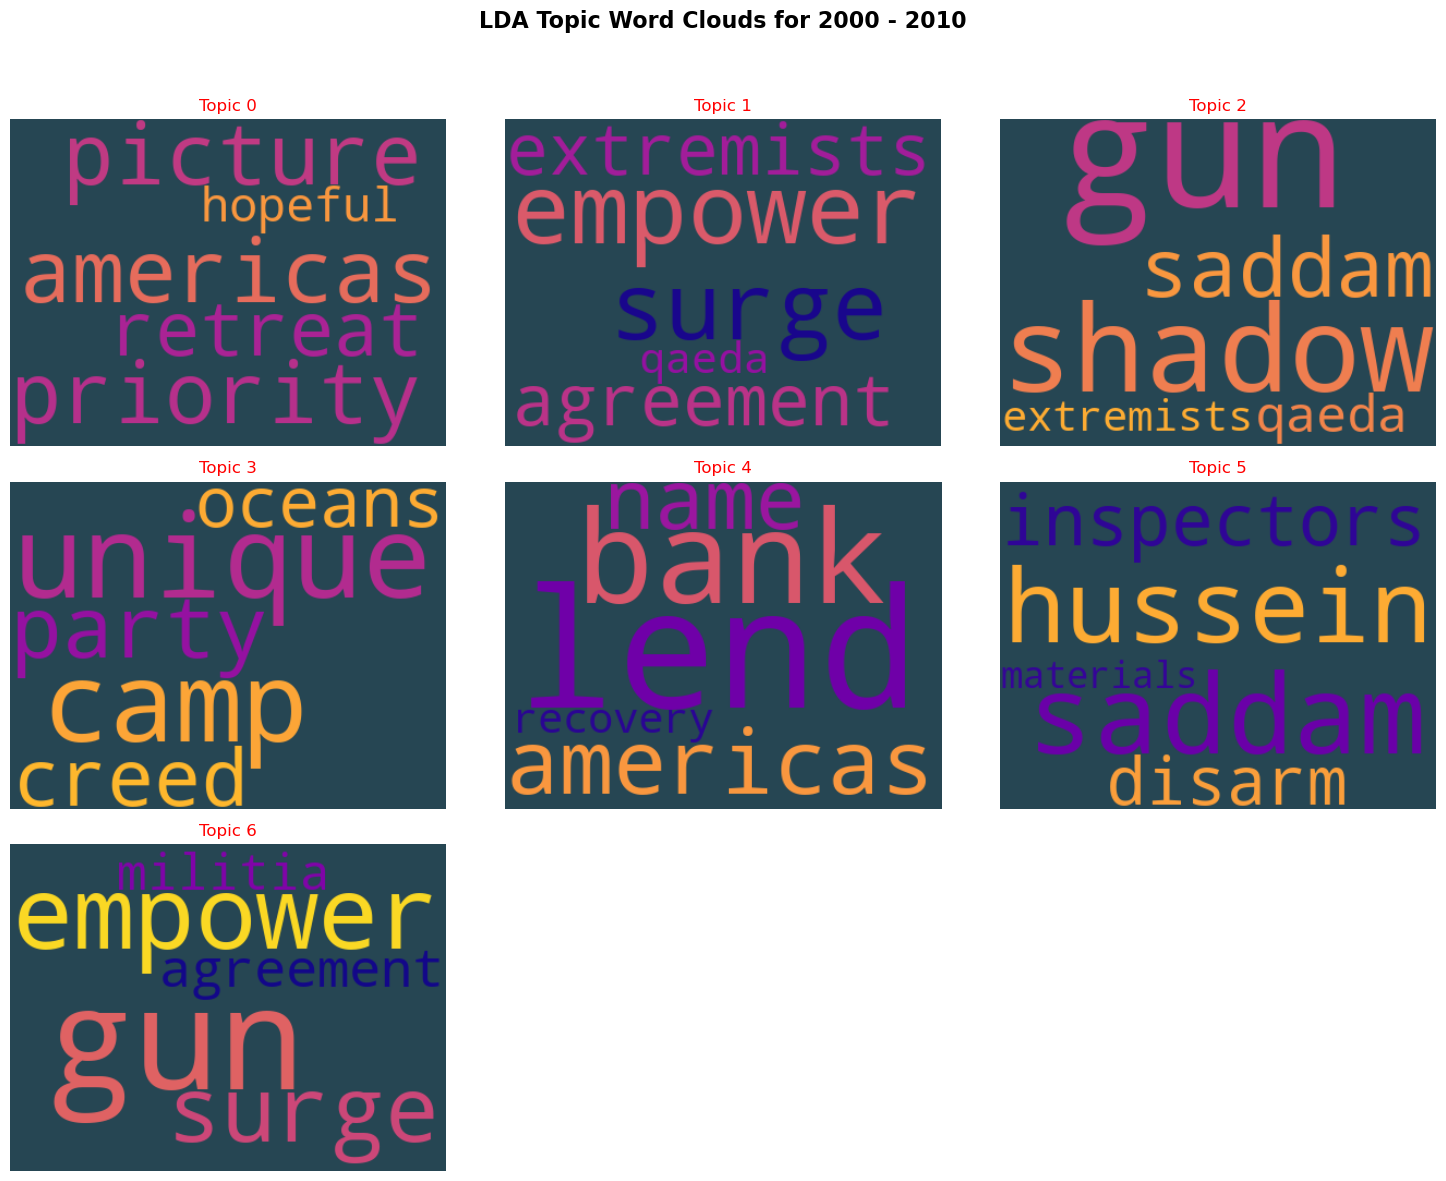

In [208]:
# plot the wordcloud for the topics in lda
for decade, topics in topics_decade_lda.items():
    plot_topic_wordcloud(
        topics, fig_title=f"LDA Topic Word Clouds for {decade} - {decade + 10}"
    )